# Notebook

## Table of Contents

- [Table of Contents](#table-of-contents)
- [1. Introduction and Dataset Overview](#1-introduction-and-dataset-overview)
  - [1.1 Variables](#11-variables)
  - [1.2 Target Variable](#12-target-variable)
  - [1.3 Data Preparation Process](#13-data-preparation-process)
- [2. Method](#2-method)
  - [2.1 Feature Engineering](#21-feature-engineering)
    - [a. Derived Interaction Variables](#a-derived-interaction-variables)
    - [b. Classifier Categorical Variables](#b-classifier-categorical-variables)
  - [2.2 Modeling Process](#22-modeling-process)
    - [a. Scaling and Transformation](#a-scaling-and-transformation)
    - [b. Performance Metrics](#b-performance-metrics)
    - [c. Statistical Significance Tests](#c-statistical-significance-tests)
- [3. Research](#3-research)
  - [Import Libraries](#import-libraries)
  - [Data](#data)
  - [Feature Engineering](#feature-engineering)
  - [EDA](#eda)
  - [Modelling](#modelling)
  - [PCA](#pca)
    - [Principal Component Analysis (PCA)](#principal-component-analysis-pca)
    - [PCA - Code](#pca---code)
  - [PLS](#pls)
    - [Partial Least Squares Regression (PLS)](#partial-least-squares-regression-pls)
    - [PLS Code](#pls-code)
  - [Linear Regression](#linear-regression)
    - [Scale](#scale)
    - [PCA + LR](#pca--lr)
    - [PLS + LR](#pls--lr)
    - [Results](#results)
  - [Ridge](#ridge)
    - [Without Scale](#without-scale)
    - [Scale + Ridge](#scale--ridge)
    - [Scale + PCA + Ridge](#scale--pca--ridge)
    - [Scale + PLS + Ridge](#scale--pls--ridge)
  - [Lasso](#lasso)
    - [Without Scale](#without-scale)
    - [Scale + Lasso](#scale--lasso)
    - [Scale + PCA + Lasso](#scale--pca--lasso)
    - [Scale + PLS + Lasso](#scale--pls--lasso)
  - [KNN](#knn)
  - [Decision Tree](#decision-tree)
  - [Bagging Regressor](#bagging-regressor)
  - [Random Forest](#random-forest)
  - [Gradient Boost](#gradient-boost)
  - [XGBoost](#xgboost)
  - [SVM](#svm)
  - [ANN](#ann)
  - [Model Choosing](#model-choosing)
- [4. Results](#4-results)
  - [Model Comparison and Evaluation of Results](#model-comparison-and-evaluation-of-results)
    - [4.1 Model Comparison and Evaluation of Results](#41-model-comparison-and-evaluation-of-results)
    - [4.2 Impact of Scaling and Dimensionality Reduction Methods](#42-impact-of-scaling-and-dimensionality-reduction-methods)
    - [4.3 Statistical Significance Tests](#43-statistical-significance-tests)
  - [Feature Importance](#feature-importance)
    - [4.4 Interpretation of Feature Importance](#44-interpretation-of-feature-importance)
    - [Interpretation and Recommendation](#interpretation-and-recommendation)
  - [Shap Analysis](#shap-analysis)
    - [What is Shap ?](#what-is-shap-)
    - [Shap](#shap)
  - [Shap vs Feature Importance](#shap-vs-feature-importance)
    - [Interpretive Differences](#interpretive-differences)
    - [Commentary](#commentary)
    - [Conclusion](#conclusion)

## 1. Introduction and Dataset Overview

This study focuses on the prediction of Land Surface Temperature (LST) using MODIS satellite data obtained through remote sensing. In this modeling process, which covers the Marmara Region, the MOD11A1 product from MODIS sensors was taken as the base, and various derived variables were integrated.

The dataset includes geographic coordinates of each pixel along with surface temperature, emissivity values, vegetation and water indices, solar and view angles, and topographic features. These variables were selected to capture the effects of both atmospheric and surface physical conditions on temperature.

### 1.1 Variables

The dataset consists of the following variables:

- **Positional Information**:
  - `Latitude`, `Longitude`: The latitude and longitude coordinates of each pixel.

- **LST (Land Surface Temperature) and Derivatives**:
  - `LST_Day`: Daytime land surface temperature obtained from the MODIS MOD11A1 product (target variable).
  - `LST_Night`: Nighttime surface temperature for the same pixel.
  - `LST_Diff`: Difference between daytime and nighttime temperatures.

- **Emissivity**:
  - `Emis_31`, `Emis_32`: Emissivity values for MODIS thermal bands 31 and 32.

- **Vegetation and Water Indices**:
  - `NDVI`: Normalized Difference Vegetation Index.
  - `EVI`: Enhanced Vegetation Index.
  - `NDWI`: Normalized Difference Water Index.

- **Solar and View Angle Information**:
  - `Sun_Angle`: Sun Zenith Angle.
  - `View_Angle`: The angle at which the satellite sensor views the surface.
  - `Rel_Azimuth`: Relative azimuth angle between the sun and the satellite.

- **Surface Reflectance**:
  - `Albedo_Diff`: Day-night albedo difference (derived from MCD43A3).

- **Topographic Feature**:
  - `DEM`: Elevation data obtained from the Digital Elevation Model.

### 1.2 Target Variable

`LST_Day` was used as the target variable in the modeling process. All other variables represent environmental and physical factors that may influence this value.

### 1.3 Data Preparation Process

MODIS products were obtained in raster format; granules were merged, and areas belonging to the Marmara Region were selected through masking. All layers were aligned at the pixel level and transformed into tabular format; missing data were cleaned, and KNN-based imputation was applied when necessary. Before modeling, independent variables were normalized using `StandardScaler`.

This structure enabled comparative evaluation of different regression algorithms; particularly, the temperature prediction performances of linear and non-linear methods were analyzed statistically.

## 2. Method

This section explains the feature engineering techniques, regression models, hyperparameter optimization, and statistical comparison methods applied during the analysis process.

### 2.1 Feature Engineering

In the modeling process, not only raw variables were used, but also new derived variables were created that carry physical meaning and could enhance the explanatory power of the model. The feature engineering process is primarily based on three types of interactions and regional classifications:

#### a. Derived Interaction Variables

- `NDVI_EVI_Diff`, `NDVI_NDWI_Ratio`, `NDVI_Sun_Interaction`
- `LST_Albedo_Ratio`
- `Latitude_Sun_Interaction`, `Latitude_DEM_Ratio`, `Sun_View_Combo`, `Azimuth_View_Sum`

#### b. Classifier Categorical Variables

- `NDVI_Class`, `Sun_Class`, `Lat_Zone`, `Albedo_Class`

These categorical variables were converted into binary (dummy) variables using the `get_dummies()` function and included in the model.

### 2.2 Modeling Process

A total of 11 different regression algorithms were applied during the modeling process:

- Linear Regression, Ridge, Lasso, KNN, Decision Tree, Bagging, Random Forest, Gradient Boosting, XGBoost, SVR, ANN

Hyperparameter tuning for each model was performed using `GridSearchCV`, and 5-fold cross-validation was applied using `cross_val_score`.

#### a. Scaling and Transformation

For `Linear Regression`, `KNN`, and `SVR`, scaling was applied using `StandardScaler`. Additionally, PCA and PLS transformations were tested.

#### b. Performance Metrics

Model performance was evaluated using:
- Mean Squared Error (MSE)
- Coefficient of Determination (R²)

#### c. Statistical Significance Tests

- Paired t-test  
- Wilcoxon Signed-Rank Test  

were used to assess the statistical significance of differences between models.


## 3. Research

### Import Libraries

In [1]:
# Data Handling & Computation
import numpy as np
import pandas as pd
from numpy import argmin, argmax

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Stats & Math
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# Preprocessing & Dimensionality Reduction
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

# Model Selection & Evaluation
from sklearn.model_selection import (
    train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
)
from sklearn.metrics import mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import (
    LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Block Error Messages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.impute import KNNImputer
from scipy.stats import randint, uniform
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import ttest_rel, wilcoxon

import shap

### Data

In [2]:
data = pd.read_csv("dataset_v3.csv")

In [3]:
data.columns

Index(['Latitude', 'Longitude', 'LST_Day', 'LST_Night', 'LST_Diff', 'Emis_31',
       'Emis_32', 'NDVI', 'EVI', 'NDWI', 'Sun_Angle', 'Albedo_Diff',
       'View_Angle', 'Rel_Azimuth', 'DEM'],
      dtype='object')

There is a logical multicorrelanity with LST_Diff and LST_Day so i drop the LST_Diff

### Feature Engineering

In [4]:
# Plant Interactions
data['NDVI_EVI_Diff'] = data['NDVI'] - data['EVI']
data['NDVI_NDWI_Ratio'] = data['NDVI'] / (data['NDWI'] + 1e-5)
data['NDVI_Sun_Interaction'] = data['NDVI'] * data['Sun_Angle']

# Tempature Interactions
data['LST_Albedo_Ratio'] = data['LST_Day'] / (data['Albedo_Diff'] + 1e-5)

# Latitude Interactions
data['Latitude_Sun_Interaction'] = data['Latitude'] * data['Sun_Angle']
data['Latitude_DEM_Ratio'] = data['Latitude'] / (data['DEM'] + 1e-5)
data['Sun_View_Combo'] = data['Sun_Angle'] * data['View_Angle']
data['Azimuth_View_Sum'] = data['Rel_Azimuth'] + data['View_Angle']

In [5]:
data['NDVI_Class'] = pd.cut(data['NDVI'], bins=[-1, 0, 0.2, 0.5, 0.8, 1], labels=['No veg', 'Bare soil', 'Shrub', 'Grass', 'Forest'])
data['Sun_Class'] = pd.cut(data['Sun_Angle'], bins=[-1, 0.1, 30, 90], labels=['Night', 'Low Sun', 'High Sun'])
data['Lat_Zone'] = pd.cut(data['Latitude'], bins=[40, 41, 42, 43], labels=['South', 'Central', 'North'])
data['Albedo_Class'] = pd.qcut(data['Albedo_Diff'], q=3, labels=['Low', 'Medium', 'High'])
data = pd.get_dummies(data, columns=['NDVI_Class', 'Sun_Class', 'Lat_Zone', 'Albedo_Class'], drop_first=True)

### EDA

In [6]:
data.shape          # rows, columns
data.info()         # types & non-null count
data.describe()     # summary stats
data.isna().sum().sum() # missing value check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23815 entries, 0 to 23814
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Latitude                  23815 non-null  float64
 1   Longitude                 23815 non-null  float64
 2   LST_Day                   23815 non-null  float64
 3   LST_Night                 23815 non-null  float64
 4   LST_Diff                  23815 non-null  float64
 5   Emis_31                   23815 non-null  float64
 6   Emis_32                   23815 non-null  float64
 7   NDVI                      23815 non-null  float64
 8   EVI                       23815 non-null  float64
 9   NDWI                      23815 non-null  float64
 10  Sun_Angle                 23815 non-null  float64
 11  Albedo_Diff               23815 non-null  float64
 12  View_Angle                23815 non-null  float64
 13  Rel_Azimuth               23815 non-null  float64
 14  DEM   

0

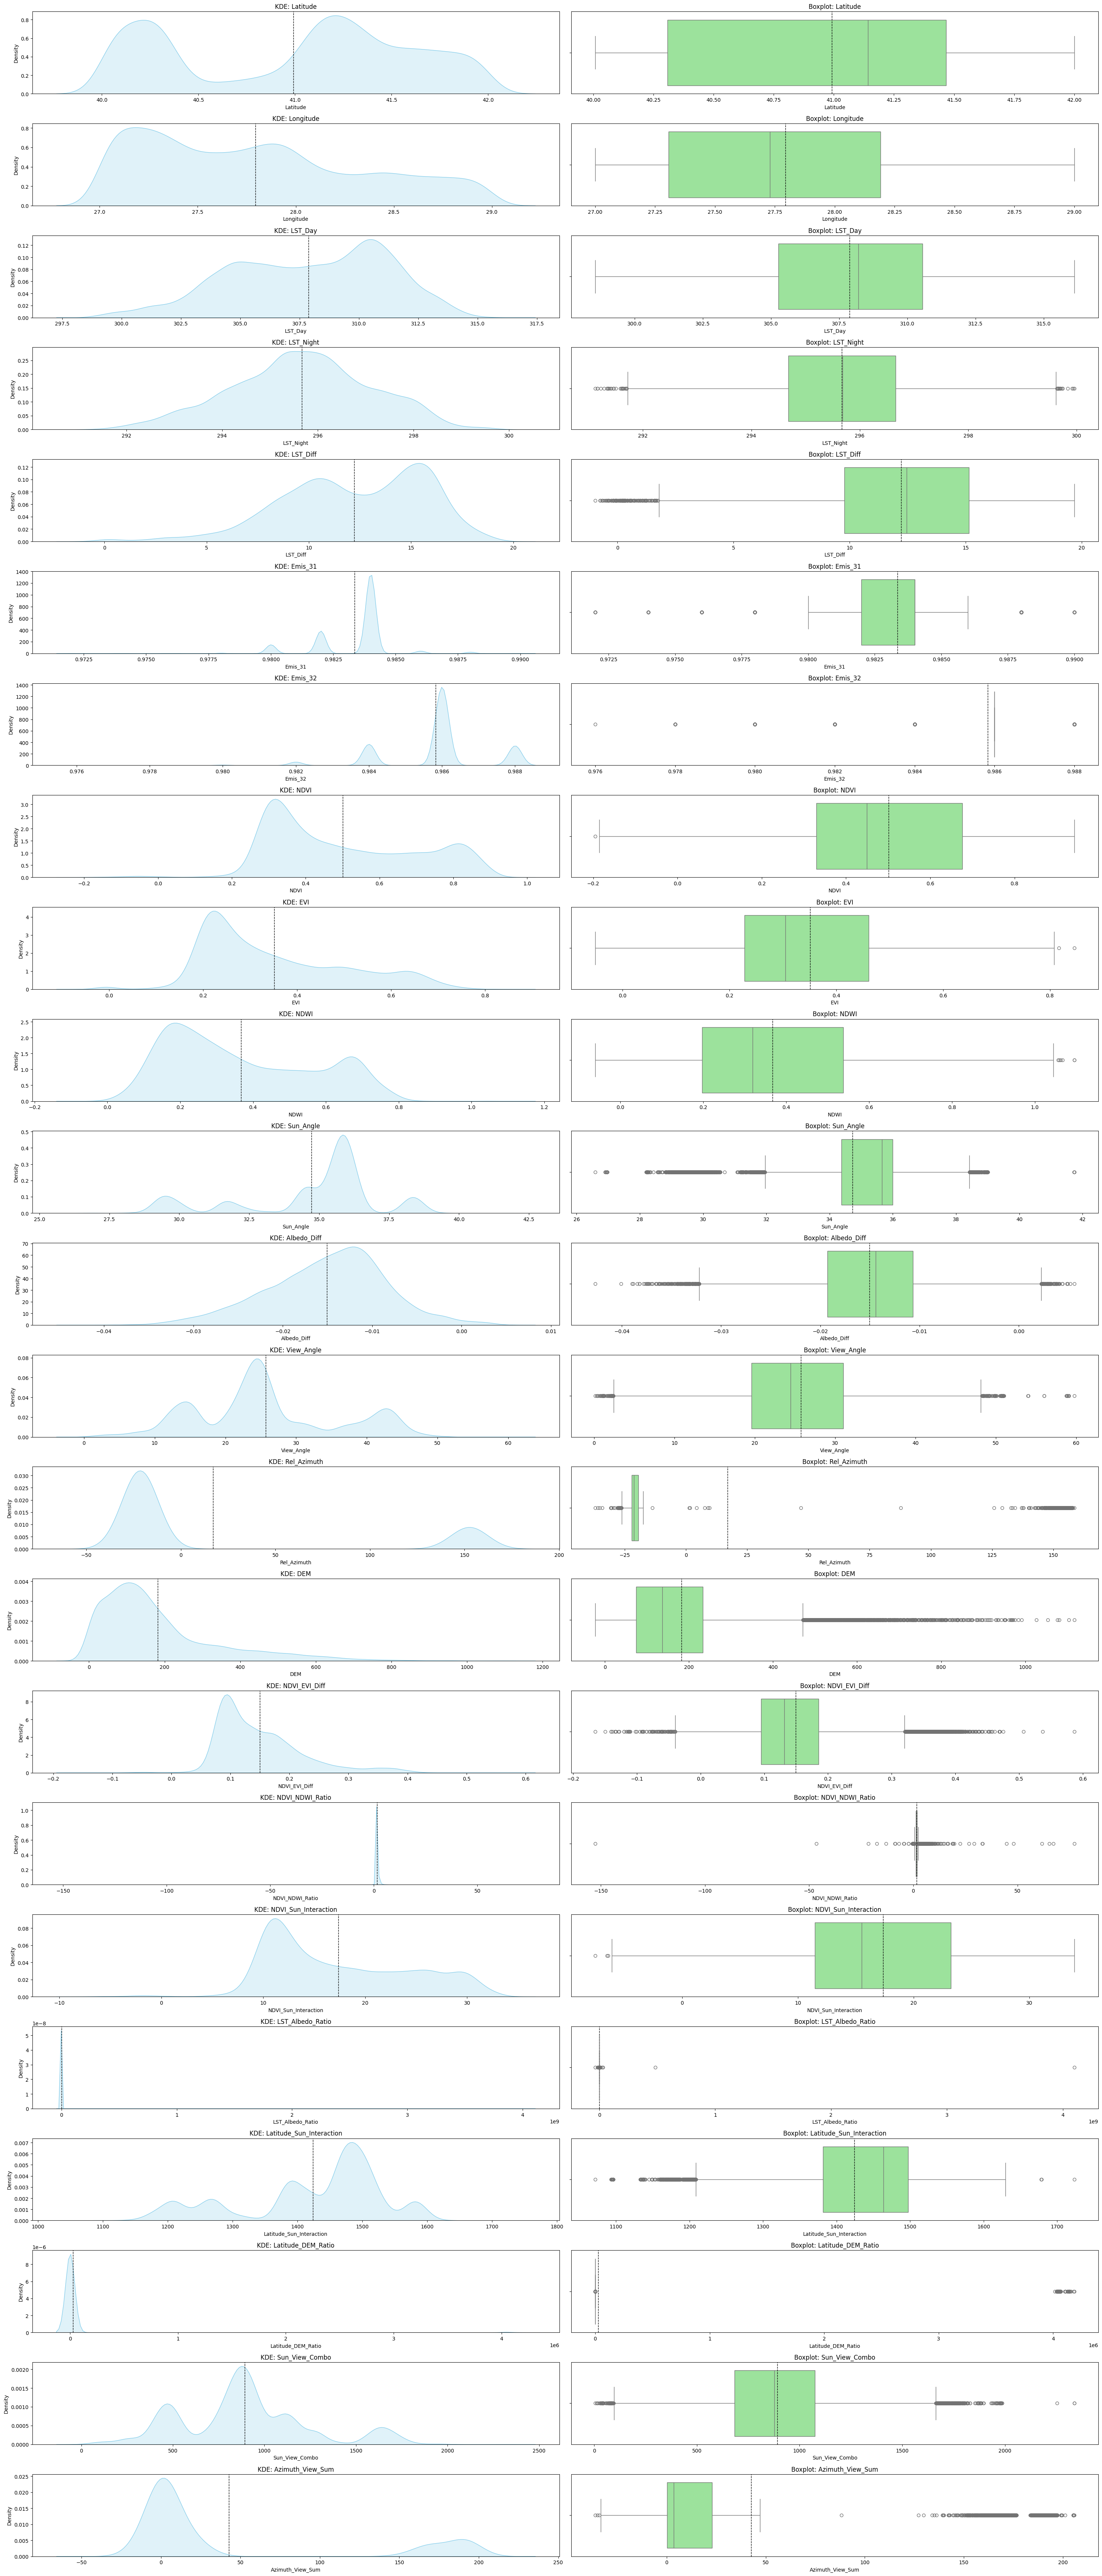

In [7]:
plt.figure(figsize=(30, 70))

num_cols = data.select_dtypes(include="float64").columns

for i, col in enumerate(data.select_dtypes(include="float64")):
    # KDE
    plt.subplot(len(num_cols), 2, 2 * i + 1)
    sb.kdeplot(data[col], fill=True, color='skyblue')
    plt.title(f"KDE: {col}")
    plt.axvline(data[col].mean(), color='black', linestyle='--', linewidth=1)

    # Boxplot
    plt.subplot(len(num_cols), 2, 2 * i + 2)
    sb.boxplot(x=data[col], color='lightgreen')
    plt.title(f"Boxplot: {col}")
    plt.axvline(data[col].mean(), color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

In [8]:
# 1. Convert Inf values to NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. Identify continuous numerical variables (excluding bools and one-hot encoded columns)
continuous_cols = [
    col for col in data.columns 
    if pd.api.types.is_float_dtype(data[col]) and data[col].nunique() > 3
]

# 3. Mark outliers as NaN using z-score
for col in continuous_cols:
    z_scores = zscore(data[col].dropna())
    outlier_idx = data[col].dropna().index[np.abs(z_scores) > 2.5]
    data.loc[outlier_idx, col] = np.nan

# 4. Apply KNN Imputer only to these continuous columns
imputer = KNNImputer(n_neighbors=5)
data_imputed_part = pd.DataFrame(imputer.fit_transform(data[continuous_cols]), columns=continuous_cols)

# 5. Keep other columns as they are
other_cols = data.columns.difference(continuous_cols)
data_final = pd.concat([data_imputed_part, data[other_cols].reset_index(drop=True)], axis=1)

# (Optional) Restore the original column order
data_final = data_final[data.columns]

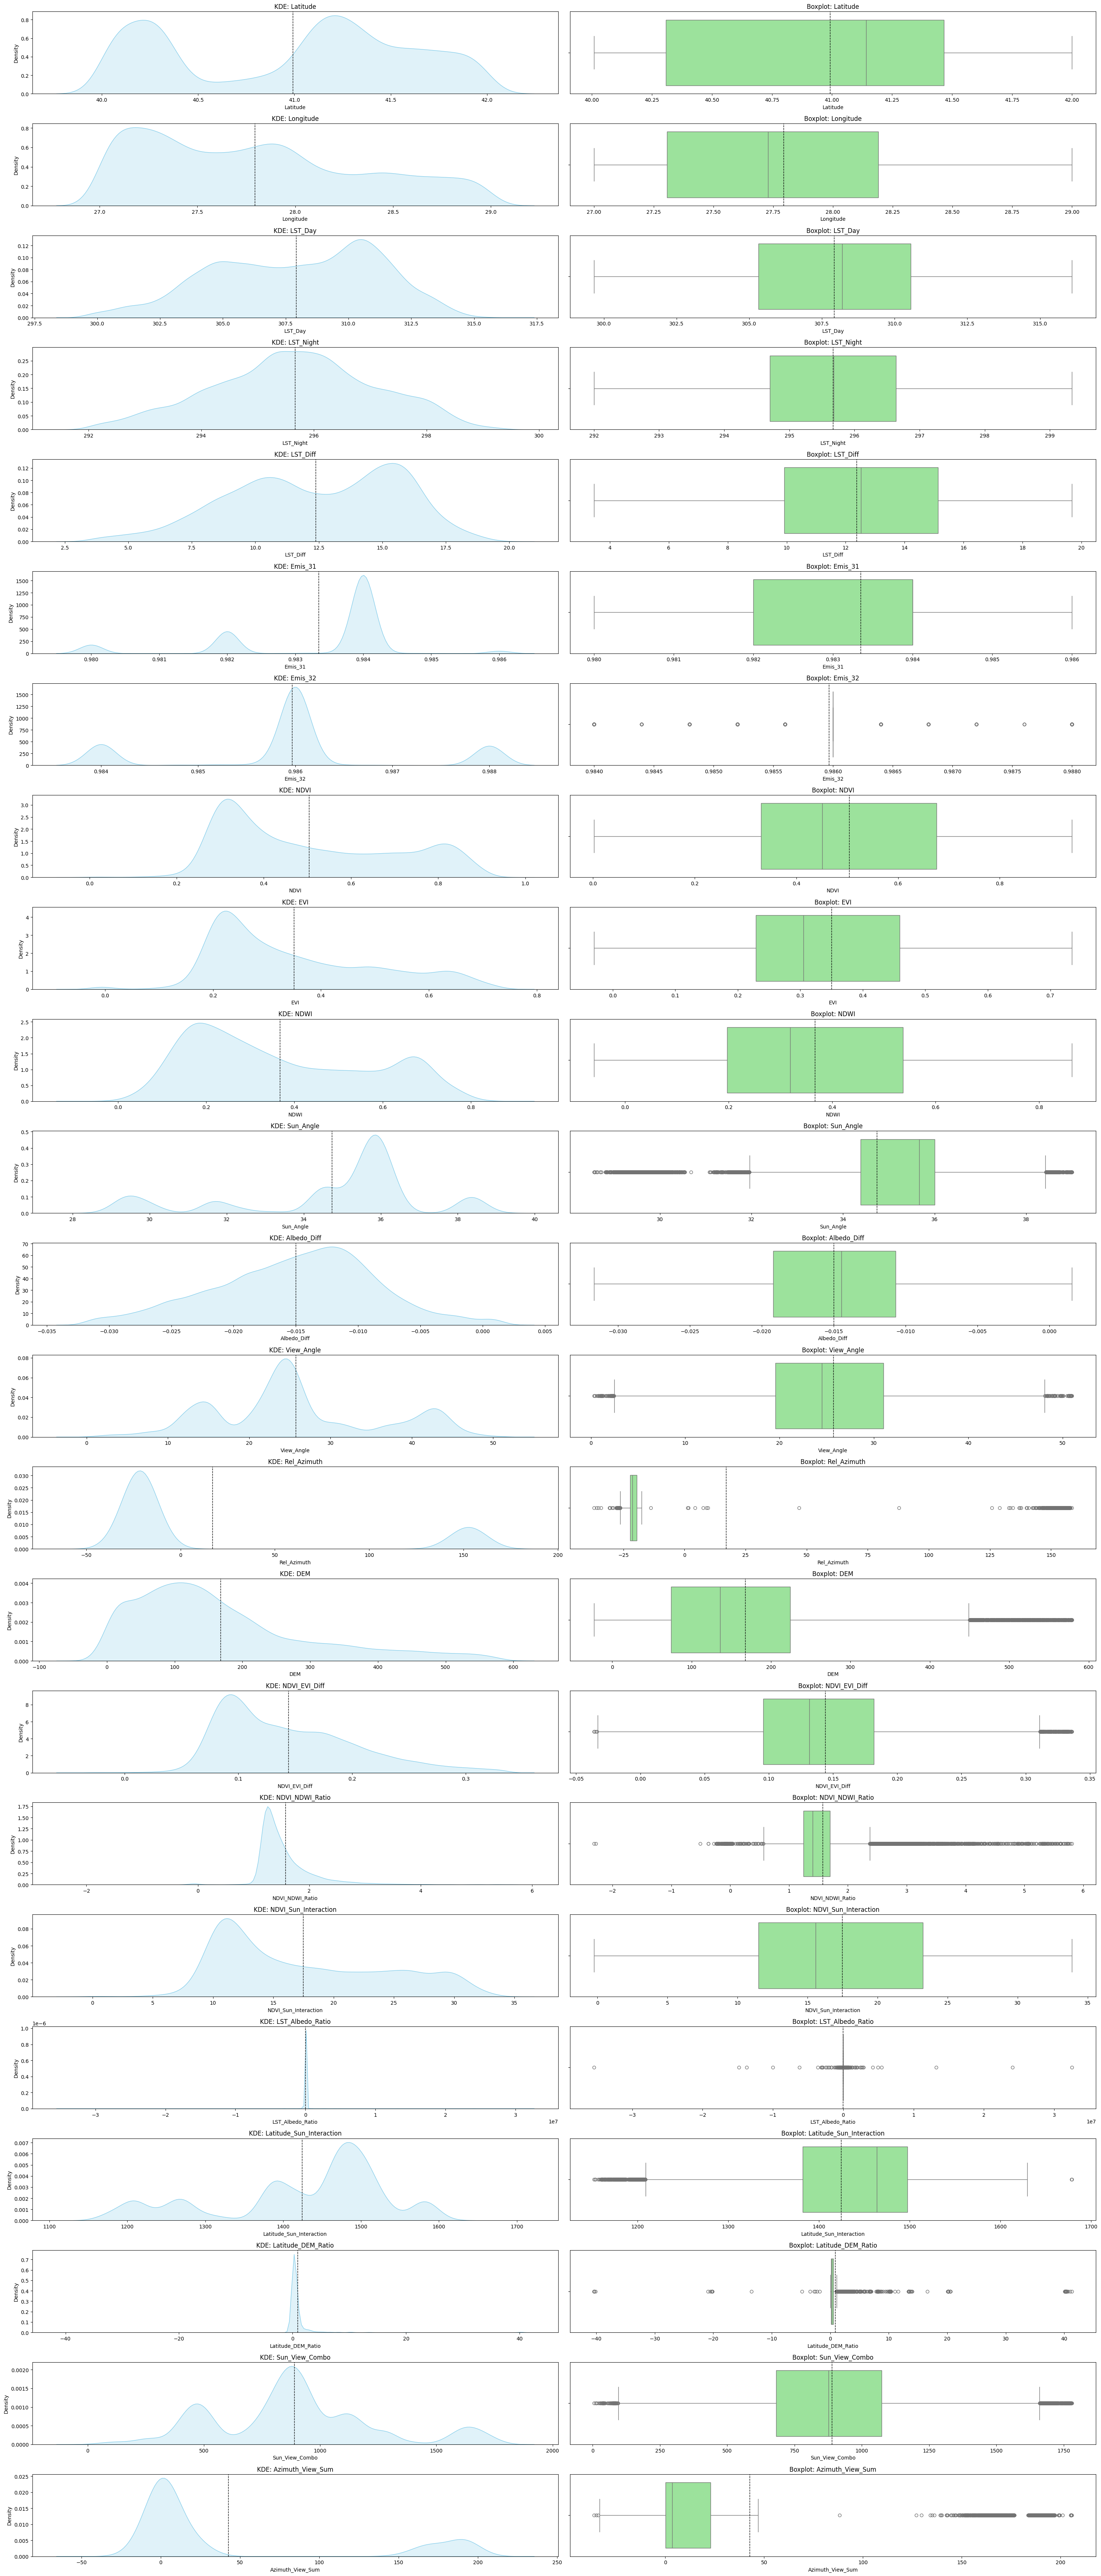

In [9]:
plt.figure(figsize=(30, 70))


num_cols = data_final.select_dtypes(include="float64").columns

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, 2 * i + 1)
    sb.kdeplot(data_final[col].dropna(), fill=True, color='skyblue')
    plt.title(f"KDE: {col}")
    plt.axvline(data_final[col].mean(), color='black', linestyle='--', linewidth=1)

    plt.subplot(len(num_cols), 2, 2 * i + 2)
    sb.boxplot(x=data_final[col].dropna(), color='lightgreen')
    plt.title(f"Boxplot: {col}")
    plt.axvline(data_final[col].mean(), color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

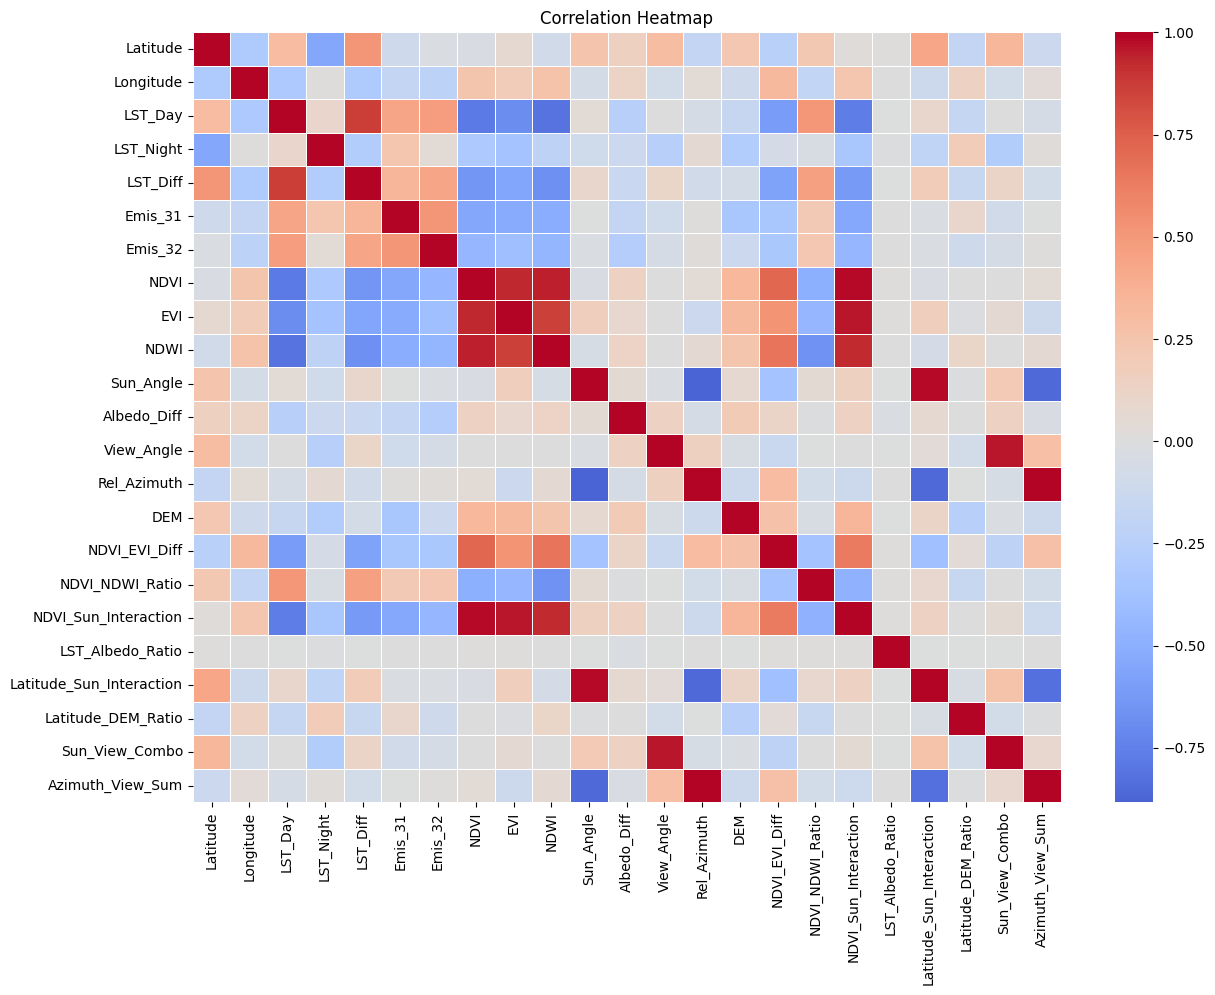

In [10]:
clean_data = data_final.select_dtypes(include=['float64', 'int64']).dropna()

plt.figure(figsize=(14, 10))
sb.heatmap(clean_data.corr(), cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Modelling

In [11]:
y = data_final["LST_Day"]
X = data_final.drop(columns=['LST_Diff','LST_Day'],axis=1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the training and test sets separately
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### PCA

#### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is an unsupervised dimensionality reduction technique that aims to represent the multivariate structure in high-dimensional data through a smaller number of new components. Its primary goal is to use the correlations among variables to create a new coordinate system that best preserves the information (variance).

##### Theoretical Background

PCA is based on the eigenvalue and eigenvector decomposition of the covariance matrix of the dataset. The resulting eigenvectors represent the new axes, i.e., the components, while the eigenvalues indicate the amount of variance carried by these axes.

- The first component (PC1) explains the largest portion of the total variance in the dataset.
- The second component (PC2), orthogonal to PC1, explains the next highest portion of the remaining variance.
- This process continues sequentially until the desired number of components is reached.

The new components are linear combinations of the original variables and are orthogonal to each other. In this way, the data structure is represented in a lower-dimensional space while preserving as much information as possible.

##### Applications and Reasons for Use

- Reducing computational load by lowering dimensionality  
- Preventing overfitting  
- Filtering out noise  
- Visualization (especially in 2D/3D)  
- Reducing multicollinearity among variables  

##### Important Considerations in Practice

- PCA only accounts for linear relationships. For nonlinear structures, methods like Kernel PCA should be preferred.  
- Before applying PCA, the data must be brought to the same scale. Therefore, standardization (e.g., using `StandardScaler`) is essential.  
- The component loadings should be interpreted to analyze how strongly each variable is associated with each component.

#### PCA - Code

In [13]:
# Fit PCA to the entire training data
pca = PCA().fit(x_train)

# Calculate cumulative explained variance
explained_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
n_components = np.argmax(explained_cumsum >= 0.95) + 1

print(f"Number of components needed to explain 95% of variance: {n_components}")
print(f"Explained variance ratio: {explained_cumsum[n_components - 1]}")
print(f"Explained variance ratio of first 5 components: {explained_cumsum[:5]}")


Number of components needed to explain 95% of variance: 1
Explained variance ratio: 0.9999989547989493
Explained variance ratio of first 5 components: [0.99999895 0.99999975 0.99999989 0.99999999 1.        ]


Number of components needed to explain 95% of variance: 16
Explained variance ratio: 0.9636118651463179


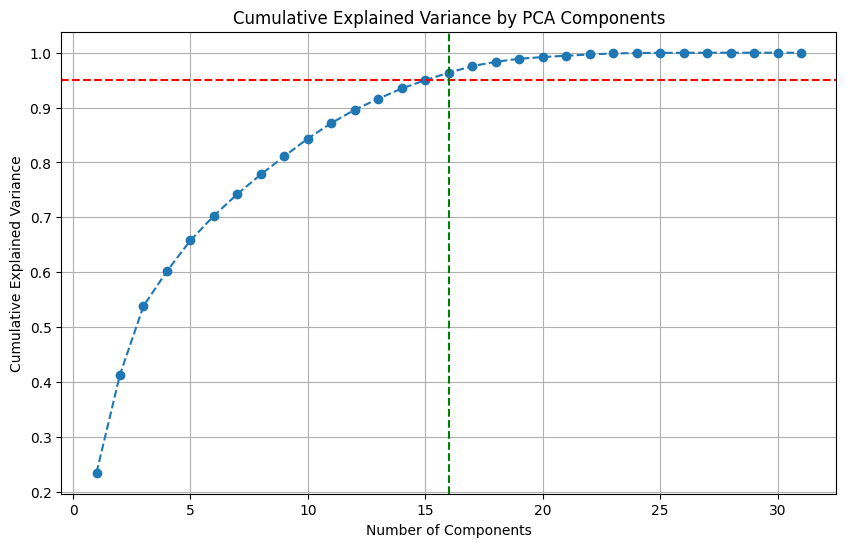

In [14]:
# Fit PCA to the entire training data
pca = PCA().fit(x_train_scaled)

# Calculate cumulative explained variance
explained_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
n_components = np.argmax(explained_cumsum >= 0.95) + 1

print(f"Number of components needed to explain 95% of variance: {n_components}")
print(f"Explained variance ratio: {explained_cumsum[n_components - 1]}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_cumsum) + 1), explained_cumsum, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components, color='g', linestyle='--')
plt.grid()


### PLS

#### Partial Least Squares Regression (PLS)

Partial Least Squares Regression (PLS) is an effective modeling method for high-dimensional regression problems, particularly in situations with high correlations (multicollinearity) among variables. It generates new components by considering the variance in both the independent variables (X) and the dependent variables (Y), and builds the regression model based on these components.

##### Theoretical Background

PLS operates similarly to Principal Component Regression (PCR) in that it is component-based; however, the key difference is that it selects components to **maximize the covariance between X and Y**, rather than just the variance in X.

Thanks to this property, PLS is particularly effective when:

- The number of independent variables exceeds the number of observations,  
- There is high correlation among variables,  
- The Y variable is multivariate (i.e., multiple outputs).  

PLS projects both the X and Y matrices simultaneously to obtain shared components. These components retain information from X while preserving explanatory power for Y.

##### Applications and Reasons for Use

- Fields with high-dimensional data such as chemistry, genomics, and metabolomics  
- Regression problems with strong multicollinearity  
- Multivariate regression analyses where Y contains multiple outputs  

##### Important Considerations in Practice

- The PLS model is **sensitive to data scaling**. Therefore, it is recommended to standardize both matrices (X and Y).  
- The optimal number of components should be determined using methods such as cross-validation.  
- Using too many components may introduce noise into the model; thus, a balance between explanatory power and generalizability should be maintained.


#### PLS Code

In [15]:
# Try a high number of components to start with
max_components = x_train_scaled.shape[1]  # Number of features
pls = PLSRegression(n_components=max_components)
pls.fit(x_train_scaled, y_train)

# Compute explained variance in X (or Y)
# This is X-variance explained per component
x_scores = pls.x_scores_
x_var = np.var(x_scores, axis=0)
x_var_ratio = x_var / np.sum(x_var)
explained_cumsum = np.cumsum(x_var_ratio)

# 95% threshold
n_components = np.argmax(explained_cumsum >= 0.95) + 1

# Output
print(f"Number of components needed to explain 95% of variance in X: {n_components}")
print(f"Explained variance ratio (cumulative): {explained_cumsum[n_components - 1]:.4f}")
print(f"Explained variance ratio of first 5 components: {explained_cumsum[:5]}")

Number of components needed to explain 95% of variance in X: 19
Explained variance ratio (cumulative): 0.9573
Explained variance ratio of first 5 components: [0.31545656 0.40557495 0.49918844 0.55644388 0.69624199]


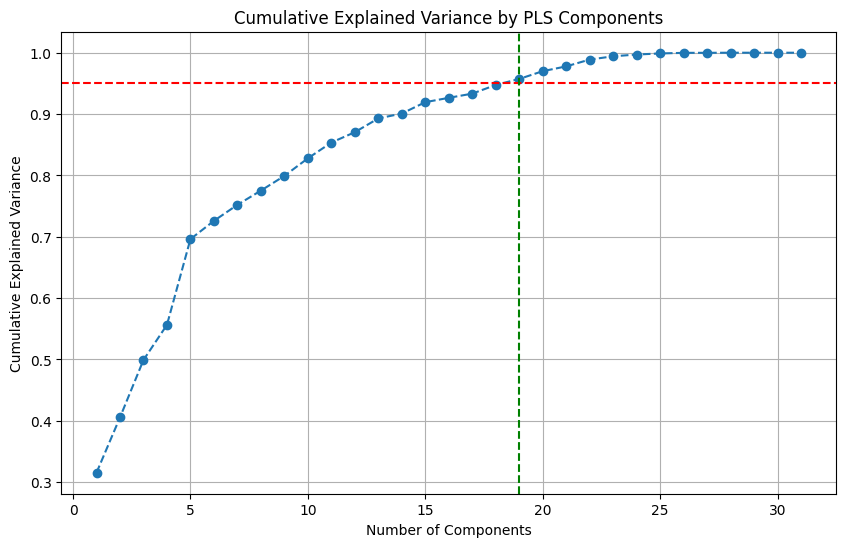

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_cumsum) + 1), explained_cumsum, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by PLS Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components, color='g', linestyle='--')
plt.grid()
plt.show()

### Linear Regression

#### Scale

In [17]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)
mse_lr_scale = mean_squared_error(y_test, y_pred)
r2_lr_scale = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse_lr_scale:.4f}")
print(f"Linear Regression R²: {r2_lr_scale:.4f}")

Linear Regression MSE: 2.0988
Linear Regression R²: 0.7987


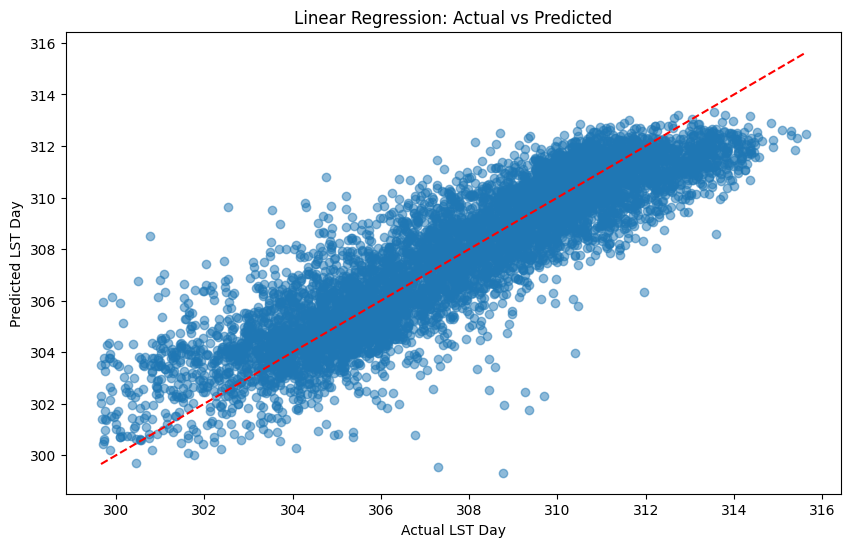

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual LST Day")
plt.ylabel("Predicted LST Day")
plt.show()

#### PCA + LR

In [19]:
# PCA with 95% variance components
pca_var = PCA(n_components=16)
x_train_pca_var = pca_var.fit_transform(x_train_scaled)
x_test_pca_var = pca_var.transform(x_test_scaled)

# PCA with elbow point components
pca_elbow = PCA(n_components=10)
x_train_pca_elbow = pca_elbow.fit_transform(x_train_scaled)
x_test_pca_elbow = pca_elbow.transform(x_test_scaled)

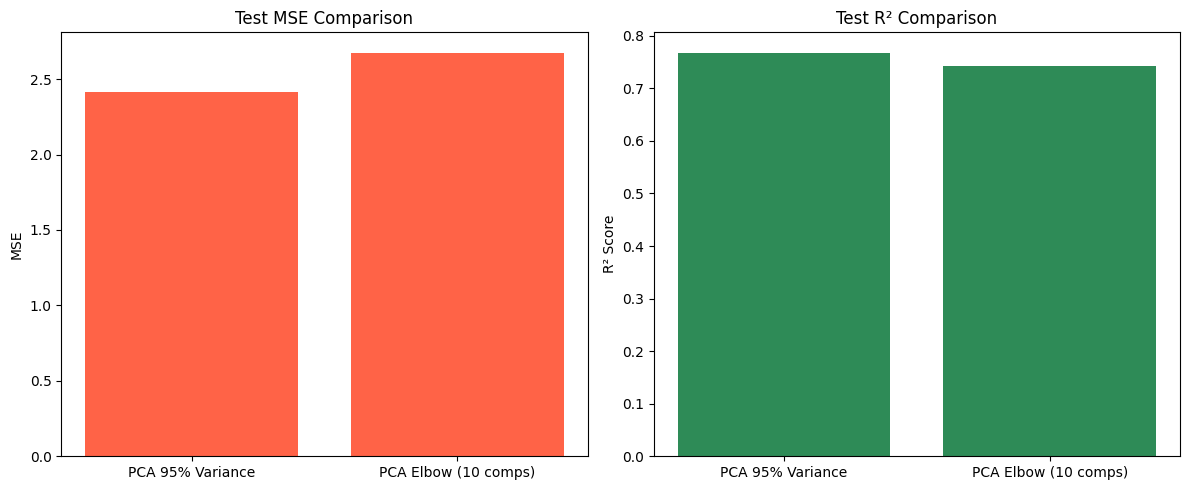

In [20]:
# Train Linear Regression for both
model_var = LinearRegression().fit(x_train_pca_var, y_train)
model_elbow = LinearRegression().fit(x_train_pca_elbow, y_train)

# Predict
y_test_hat_var = model_var.predict(x_test_pca_var)
y_test_hat_elbow = model_elbow.predict(x_test_pca_elbow)

# Metrics
mse_var = mean_squared_error(y_test, y_test_hat_var)
r2_var = r2_score(y_test, y_test_hat_var)

mse_elbow = mean_squared_error(y_test, y_test_hat_elbow)
r2_elbow = r2_score(y_test, y_test_hat_elbow)

# Plot comparison
labels = ['PCA 95% Variance', 'PCA Elbow (10 comps)']
mse_scores = [mse_var, mse_elbow]
r2_scores = [r2_var, r2_elbow]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# MSE Bar Plot
ax[0].bar(labels, mse_scores, color='tomato')
ax[0].set_title("Test MSE Comparison")
ax[0].set_ylabel("MSE")

# R² Bar Plot
ax[1].bar(labels, r2_scores, color='seagreen')
ax[1].set_title("Test R² Comparison")
ax[1].set_ylabel("R² Score")

plt.tight_layout()
plt.show()

In [21]:
# Calculate absolute errors
errors_var = np.abs(y_test - y_test_hat_var)
errors_elbow = np.abs(y_test - y_test_hat_elbow)

# Paired t-test (assumes error difference is normally distributed)
t_stat, p_val_ttest = ttest_rel(errors_elbow, errors_var)

# Wilcoxon signed-rank test (non-parametric alternative)
w_stat, p_val_wilcoxon = wilcoxon(errors_elbow, errors_var)

# Print results
print("Paired t-test p-value:", p_val_ttest)
print("Wilcoxon signed-rank test p-value:", p_val_wilcoxon)

# Optional interpretation
if p_val_ttest < 0.05:
    print(" Statistically significant difference (Paired t-test)")
else:
    print(" No significant difference (Paired t-test)")

if p_val_wilcoxon < 0.05:
    print(" Statistically significant difference (Wilcoxon test)")
else:
    print(" No significant difference (Wilcoxon test)")


Paired t-test p-value: 7.371782710230093e-40
Wilcoxon signed-rank test p-value: 6.23837077177776e-39
 Statistically significant difference (Paired t-test)
 Statistically significant difference (Wilcoxon test)


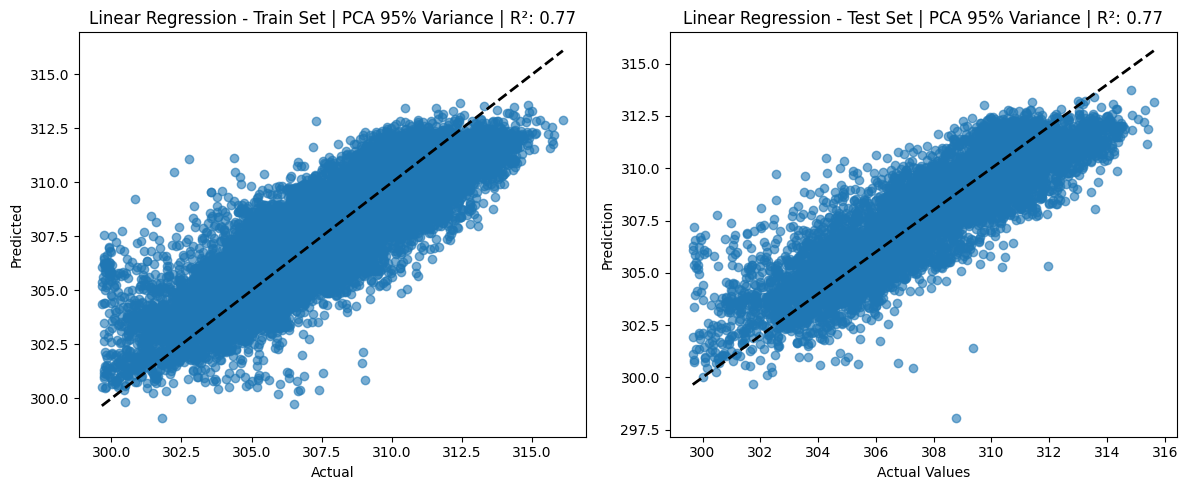

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
y_train_hat_var = model_var.predict(x_train_pca_var)
plt.scatter(y_train, y_train_hat_var, alpha=0.6)
plt.title('Linear Regression - Train Set | PCA 95% Variance | R²: {:.2f}'.format(r2_var))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(122)
plt.scatter(y_test, y_test_hat_var, alpha=0.6)
plt.title('Linear Regression - Test Set | PCA 95% Variance | R²: {:.2f}'.format(r2_var))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction')

plt.tight_layout()
plt.show()

In [23]:
mse_lr_pca = mse_var
r2_lr_pca = r2_var
print(f"Linear Regression PCA MSE: {mse_lr_pca:.4f}")
print(f"Linear Regression PCA R²: {r2_lr_pca:.4f}")

Linear Regression PCA MSE: 2.4168
Linear Regression PCA R²: 0.7682


#### PLS + LR

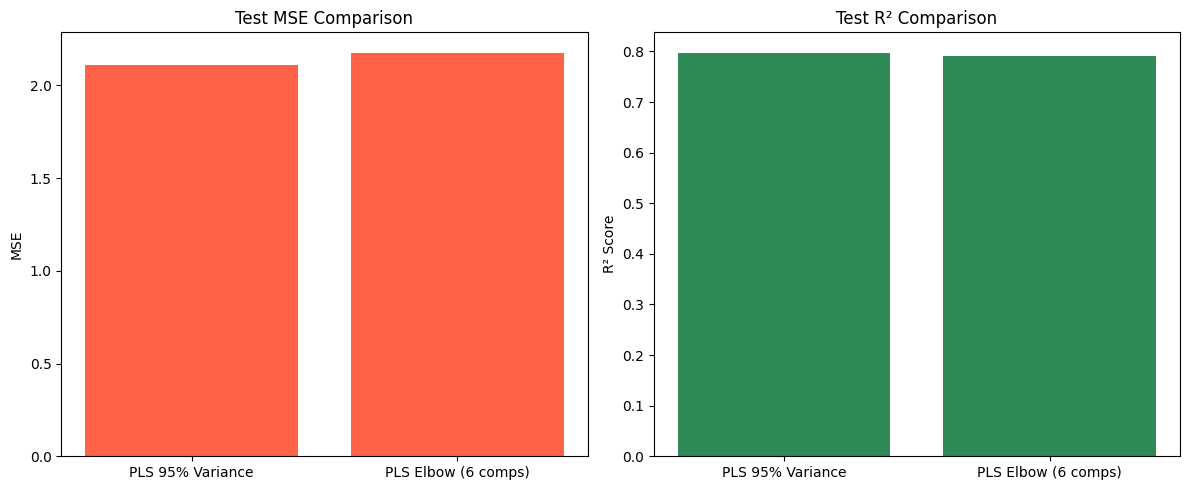

In [24]:
# Train PLS for both 19 components (variance-based) and 6 components (elbow-based)
pls_var = PLSRegression(n_components=19)
pls_var.fit(x_train_scaled, y_train)

pls_elbow = PLSRegression(n_components=6)
pls_elbow.fit(x_train_scaled, y_train)

# Predict
y_test_hat_var = pls_var.predict(x_test_scaled).ravel()  # Use ravel() to get a flat array
y_test_hat_elbow = pls_elbow.predict(x_test_scaled).ravel()

# Metrics
mse_var = mean_squared_error(y_test, y_test_hat_var)
r2_var = r2_score(y_test, y_test_hat_var)

mse_elbow = mean_squared_error(y_test, y_test_hat_elbow)
r2_elbow = r2_score(y_test, y_test_hat_elbow)

# Plot comparison
labels = ['PLS 95% Variance', 'PLS Elbow (6 comps)']
mse_scores = [mse_var, mse_elbow]
r2_scores = [r2_var, r2_elbow]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# MSE Bar Plot
ax[0].bar(labels, mse_scores, color='tomato')
ax[0].set_title("Test MSE Comparison")
ax[0].set_ylabel("MSE")

# R² Bar Plot
ax[1].bar(labels, r2_scores, color='seagreen')
ax[1].set_title("Test R² Comparison")
ax[1].set_ylabel("R² Score")

plt.tight_layout()
plt.show()

In [25]:
# Calculate absolute errors
errors_var = np.abs(y_test - y_test_hat_var)
errors_elbow = np.abs(y_test - y_test_hat_elbow)

# Paired t-test (assumes error difference is normally distributed)
t_stat, p_val_ttest = ttest_rel(errors_elbow, errors_var)

# Wilcoxon signed-rank test (non-parametric alternative)
w_stat, p_val_wilcoxon = wilcoxon(errors_elbow, errors_var)

# Print results
print("Paired t-test p-value:", p_val_ttest)
print("Wilcoxon signed-rank test p-value:", p_val_wilcoxon)

# Optional interpretation
if p_val_ttest < 0.05:
    print(" Statistically significant difference (Paired t-test)")
else:
    print(" No significant difference (Paired t-test)")

if p_val_wilcoxon < 0.05:
    print(" Statistically significant difference (Wilcoxon test)")
else:
    print(" No significant difference (Wilcoxon test)")

Paired t-test p-value: 1.3141430764374042e-06
Wilcoxon signed-rank test p-value: 1.4538595859834925e-10
 Statistically significant difference (Paired t-test)
 Statistically significant difference (Wilcoxon test)


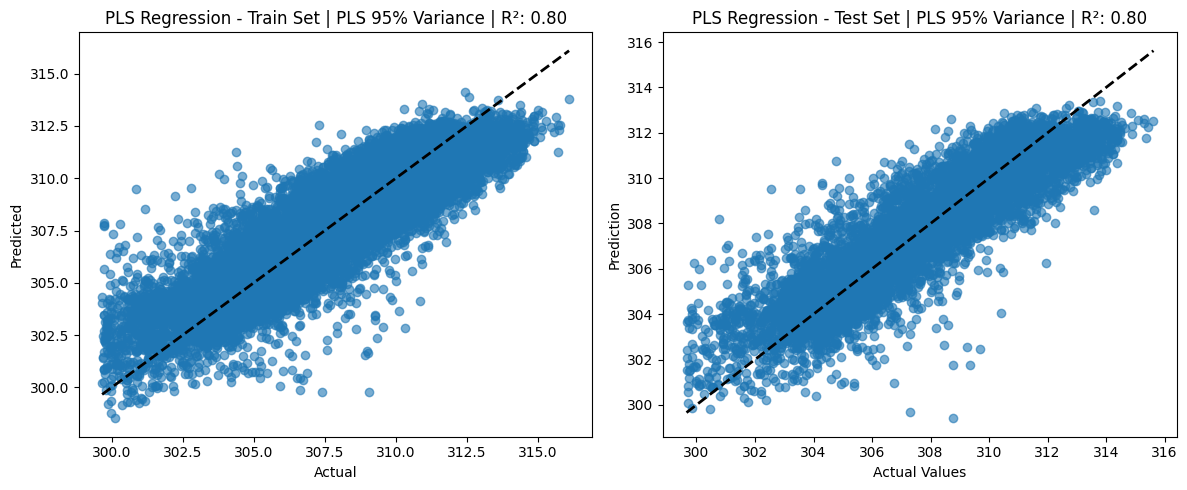

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
y_train_hat_var = pls_var.predict(x_train_scaled)
plt.scatter(y_train, y_train_hat_var, alpha=0.6)
plt.title('PLS Regression - Train Set | PLS 95% Variance | R²: {:.2f}'.format(r2_var))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(122)
plt.scatter(y_test, y_test_hat_var, alpha=0.6)
plt.title('PLS Regression - Test Set | PLS 95% Variance | R²: {:.2f}'.format(r2_var))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction')

plt.tight_layout()
plt.show()

In [27]:
mse_pls_var = mse_var
r2_pls_var = r2_var

#### Results

In [28]:
list = pd.DataFrame({'Model': ['Linear Regression','PCA + Linear' ,'PLS Regression'],
                        'MSE': [mse_lr_scale, mse_lr_pca, mse_pls_var],
                        'R2': [r2_lr_scale, r2_lr_pca, r2_pls_var]})

print(list[list['R2'] == np.max(list['R2'])],
      "\n------------------------------------------\n",
      list.sort_values('R2', ascending=False))

               Model       MSE        R2
0  Linear Regression  2.098786  0.798728 
------------------------------------------
                Model       MSE        R2
0  Linear Regression  2.098786  0.798728
2     PLS Regression  2.108593  0.797787
1       PCA + Linear  2.416836  0.768227


In [29]:
lr_r2 = r2_lr_scale
lr_mse = mse_lr_scale

### Ridge

#### Without Scale

In [30]:
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 500, 1000])
ridge_cv.fit(x_train, y_train)

print("Optimal alpha:", ridge_cv.alpha_)

y_test_hat = ridge_cv.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, y_test_hat))
print("Test R²:", r2_score(y_test, y_test_hat))

Optimal alpha: 0.01
Test MSE: 324.8900896399256
Test R²: -30.156768063464522


#### Scale + Ridge

In [31]:
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 500, 1000])
ridge_cv.fit(x_train_scaled, y_train)

print("Optimal alpha:", ridge_cv.alpha_)

y_test_hat = ridge_cv.predict(x_test_scaled)
print("Test MSE:", mean_squared_error(y_test, y_test_hat))
print("Test R²:", r2_score(y_test, y_test_hat))

# optimum r2 and mse values in 3 different models
ridge_r2 = r2_score(y_test, y_test_hat)
ridge_mse = mean_squared_error(y_test, y_test_hat)

Optimal alpha: 0.1
Test MSE: 2.0985507317027516
Test R²: 0.7987502219918703


#### Scale + PCA + Ridge

In [32]:
# Train Ridge regression with cross-validation to find the best alpha
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 500, 1000])
ridge_cv.fit(x_train_pca_var, y_train)

# Print the optimal regularization strength
print("Optimal alpha:", ridge_cv.alpha_)

# Predict on the test set
y_test_hat = ridge_cv.predict(x_test_pca_var)

# Evaluate the model on the test set
print("Test MSE:", mean_squared_error(y_test, y_test_hat))
print("Test R²:", r2_score(y_test, y_test_hat))

Optimal alpha: 100.0
Test MSE: 2.416844549132017
Test R²: 0.7682260325446966


#### Scale + PLS + Ridge

In [33]:
# Choose number of PLS components
n_components = 19  # or 6 if elbow-based

# Step 2: Apply PLS
pls = PLSRegression(n_components=n_components)
x_train_pls = pls.fit_transform(x_train_scaled, y_train)[0]
x_test_pls = pls.transform(x_test_scaled)

# Step 3: Ridge Regression with cross-validation
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 500, 1000])
ridge_cv.fit(x_train_pls, y_train)

# Step 4: Predict and evaluate
y_test_hat = ridge_cv.predict(x_test_pls)

print("Optimal alpha:", ridge_cv.alpha_)
print("Test MSE:", mean_squared_error(y_test, y_test_hat))
print("Test R²:", r2_score(y_test, y_test_hat))

Optimal alpha: 100.0
Test MSE: 2.1082438663578094
Test R²: 0.7978206560928602


### Lasso

#### Without Scale

In [34]:
# Train Lasso regression with cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], max_iter=10000, tol=0.001)
lasso_cv.fit(x_train, y_train)

# Print the optimal regularization strength
print("Optimal alpha:", lasso_cv.alpha_)

# Predict on the test set
y_test_hat = lasso_cv.predict(x_test)

# Evaluate the model on the test set
print("Test MSE:", mean_squared_error(y_test, y_test_hat))
print("Test R²:", r2_score(y_test, y_test_hat))

Optimal alpha: 0.01
Test MSE: 2.316620674492625
Test R²: 0.7778374430374638


#### Scale + Lasso

In [35]:
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100, 500, 1000], max_iter=100000)
lasso_cv.fit(x_train_scaled, y_train)

print("Optimal alpha:", lasso_cv.alpha_)

y_test_hat = lasso_cv.predict(x_test_scaled)
print("Test MSE:", mean_squared_error(y_test, y_test_hat))
print("Test R²:", r2_score(y_test, y_test_hat))

Optimal alpha: 0.01
Test MSE: 2.1164740003061224
Test R²: 0.7970313910991419


#### Scale + PCA + Lasso

In [36]:
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100, 500, 1000], max_iter=100000)
lasso_cv.fit(x_train_pca_var, y_train)

print("Optimal alpha:", lasso_cv.alpha_)

y_test_hat = lasso_cv.predict(x_test_pca_var)
print("Test MSE:", mean_squared_error(y_test, y_test_hat))
print("Test R²:", r2_score(y_test, y_test_hat))

Optimal alpha: 0.01
Test MSE: 2.4187475429010954
Test R²: 0.7680435365641171


#### Scale + PLS + Lasso

In [37]:
n_components = 19

pls = PLSRegression(n_components=n_components)
x_train_pls = pls.fit_transform(x_train_scaled, y_train)[0]
x_test_pls = pls.transform(x_test_scaled)

lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100, 500, 1000], max_iter=100000)
lasso_cv.fit(x_train_pls, y_train)

y_test_hat = lasso_cv.predict(x_test_pls)

print("Optimal alpha:", lasso_cv.alpha_)
print("Test MSE:", mean_squared_error(y_test, y_test_hat))
print("Test R²:", r2_score(y_test, y_test_hat))

lasso_r2 = r2_score(y_test, y_test_hat)
lasso_mse = mean_squared_error(y_test, y_test_hat)

Optimal alpha: 0.01
Test MSE: 2.1076556205000907
Test R²: 0.7978770685238259


### KNN

In [38]:
knn_raw = KNeighborsRegressor(n_neighbors=5).fit(x_train_scaled, y_train)
knn_pca = KNeighborsRegressor(n_neighbors=5).fit(x_train_pca_var, y_train)
knn_pls = KNeighborsRegressor(n_neighbors=5).fit(x_train_pls, y_train)

# Predictions
y_pred_raw = knn_raw.predict(x_test_scaled)
y_pred_pca = knn_pca.predict(x_test_pca_var)
y_pred_pls = knn_pls.predict(x_test_pls)

# Error arrays
errors_raw = (y_test - y_pred_raw) ** 2
errors_pca = (y_test - y_pred_pca) ** 2
errors_pls = (y_test - y_pred_pls) ** 2

# Define comparison pairs
comparisons = {
    "RAW - PLS": errors_raw - errors_pls,
    "RAW - PCA": errors_raw - errors_pca,
    "PLS - PCA": errors_pls - errors_pca
}

# Bootstrap testing
results = {}
n_iterations = 1000
for name, diff in comparisons.items():
    diff_means = [np.mean(resample(diff)) for _ in range(n_iterations)]
    mean_diff = np.mean(diff_means)
    ci_lower = np.percentile(diff_means, 2.5)
    ci_upper = np.percentile(diff_means, 97.5)
    if ci_lower > 0:
        decision = f"{name.split(' - ')[0]} is statistically worse"
    elif ci_upper < 0:
        decision = f"{name.split(' - ')[0]} is statistically better"
    else:
        decision = "No statistically significant difference"
    results[name] = {
        "mean_diff": mean_diff,
        "ci": (ci_lower, ci_upper),
        "decision": decision
    }

for i in results:
    print(i + " : " + str(results[i]['decision']))

RAW - PLS : RAW is statistically better
RAW - PCA : No statistically significant difference
PLS - PCA : No statistically significant difference


PLS is more meaningful so i will go with PLS

In [39]:
# Model Object
knn_model = KNeighborsRegressor()

# GridSearch
knn_grid = GridSearchCV(
    estimator=knn_model,
    param_grid={'n_neighbors': np.arange(1, 10),
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'metric': ['euclidean', 'manhattan', 'minkowski']},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

KNN MSE: 1.1713
KNN R²: 0.8877


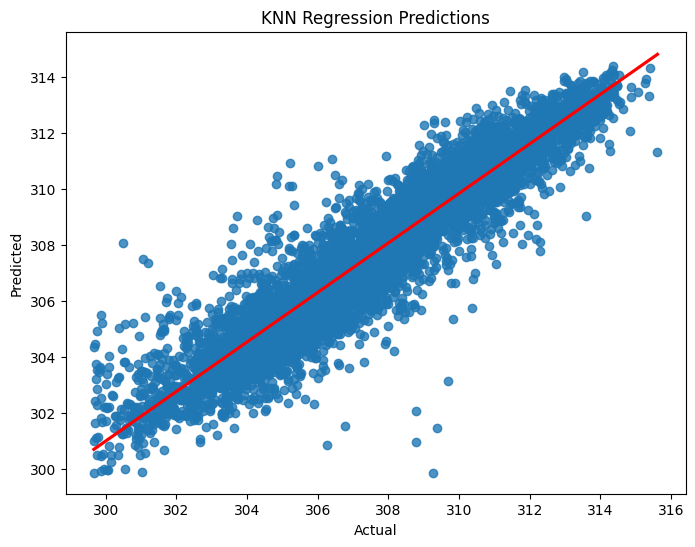

In [40]:
best_params = {
    'algorithm': 'auto',
    'metric': 'euclidean',
    'n_neighbors': 7,
    'weights': 'distance'
}

knn_best = KNeighborsRegressor(**best_params).fit(x_train_pls, y_train)

# Prediction
y_hat_knn = knn_best.predict(x_test_pls)
knn_mse = mean_squared_error(y_test, y_hat_knn)
knn_r2 = r2_score(y_test, y_hat_knn)

# Print the metrics
print(f"KNN MSE: {knn_mse:.4f}")
print(f"KNN R²: {knn_r2:.4f}")

# Regression graph
plt.figure(figsize=(8, 6))
sb.regplot(x=y_test, y=y_hat_knn, line_kws={"color": "red"})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regression Predictions")
plt.show()

### Decision Tree

In [41]:
cv = GridSearchCV(DecisionTreeRegressor(),
                param_grid = {
                    'max_depth': [3, 5, 7, 9, 11, 13],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4]
                },
                scoring = 'neg_mean_squared_error',
                cv = 10,
                n_jobs = -1
                )

cv.fit(x_train , y_train)
best_model = cv.best_estimator_
print(f"Best Model: {best_model}")
print(f"Best Parametres: {cv.best_params_}")

Best Model: DecisionTreeRegressor(max_depth=13, min_samples_leaf=4, min_samples_split=10)
Best Parametres: {'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 10}


Decision Tree MSE: 1.1233
Decision Tree R²: 0.8923


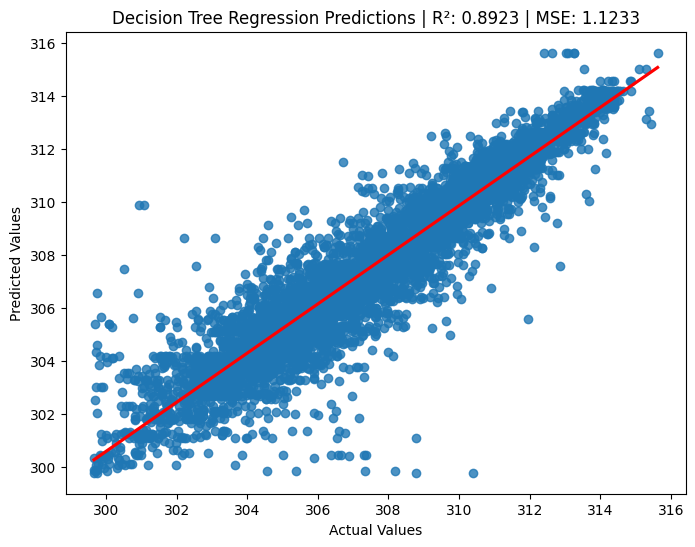

In [42]:
y_hat = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print(f"Decision Tree MSE: {mse:.4f}")
print(f"Decision Tree R²: {r2:.4f}")
plt.figure(figsize=(8, 6))
sb.regplot(x=y_test, y=y_hat, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression Predictions | R²: {:.4f} | MSE: {:.4f}".format(r2, mse))
plt.show()
dt_mse = mse
dt_r2 = r2

### Bagging Regressor

In [43]:
model = BaggingRegressor(bootstrap_features=True, n_estimators=100, random_state=42)

preds = model.fit(x_train, y_train).predict(x_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f"Bagging MSE: {mse:.4f}")
print(f"Bagging R²: {r2:.4f}")

Bagging MSE: 0.6338
Bagging R²: 0.9392


In [44]:
model = BaggingRegressor(
    n_estimators=100,
    max_samples=0.8, 
    max_features=0.8,      
    bootstrap=True,
    bootstrap_features=True,
    random_state=42,
    n_jobs=-1
)

preds = model.fit(x_train, y_train).predict(x_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f"Bagging MSE: {mse:.4f}")
print(f"Bagging R²: {r2:.4f}")
bgr_mse = mse
bgr_r2 = r2

Bagging MSE: 0.6560
Bagging R²: 0.9371


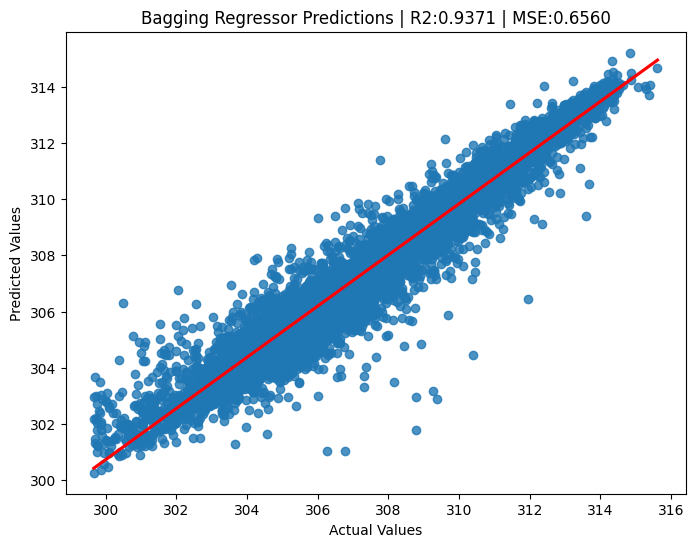

In [45]:
plt.figure(figsize=(8, 6))
sb.regplot(x=y_test, y=preds, line_kws={"color": "red"})
plt.xlabel("Actual Values"),
plt.ylabel("Predicted Values")
plt.title("Bagging Regressor Predictions | R2:{r2:.4f} | MSE:{mse:.4f}".format(r2=r2, mse=mse))
plt.show()

### Random Forest

In [ ]:
"""
params = {"max_depth": range(1, 5),
          "max_features": [8, 12],
          "n_estimators": [100, 200]}

rf_cv = GridSearchCV(RandomForestRegressor(), params, cv=10).fit(x_train, y_train)
print("Best parametres:", rf_cv.best_params_)

"""
best_params = {'max_depth': 4, 'max_features': 12, 'n_estimators': 200}

best_rf = RandomForestRegressor(**best_params).fit(x_train,y_train)
preds =  best_rf.predict(x_test)

print("Optimized RF MSE:", mean_squared_error(y_test, preds))
print("Optimized RF R2:", r2_score(y_test, preds))

Optimized RF MSE: 1.9031162067414127
Optimized RF R2: 0.8174922777208165


In [47]:
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 30),
    'max_features': ['sqrt', 'log2', 16],   
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rs = RandomizedSearchCV(rf, param_distributions=param_dist,
                        n_iter=30, scoring='r2', cv=5, verbose=1, n_jobs=-1)
rs.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000012A52AE7D70>,
                                        'max_features': ['sqrt', 'log2', 16],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000012A570738C0>},
                   scoring='r2', verbose=1)

In [48]:
print("Best Parametres:", rs.best_params_)
print("CV R²:", rs.best_score_)

y_pred = rs.best_estimator_.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))

rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

Best Parametres: {'max_depth': 25, 'max_features': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 261}
CV R²: 0.9392084140083081
Test MSE: 0.5977192271973707


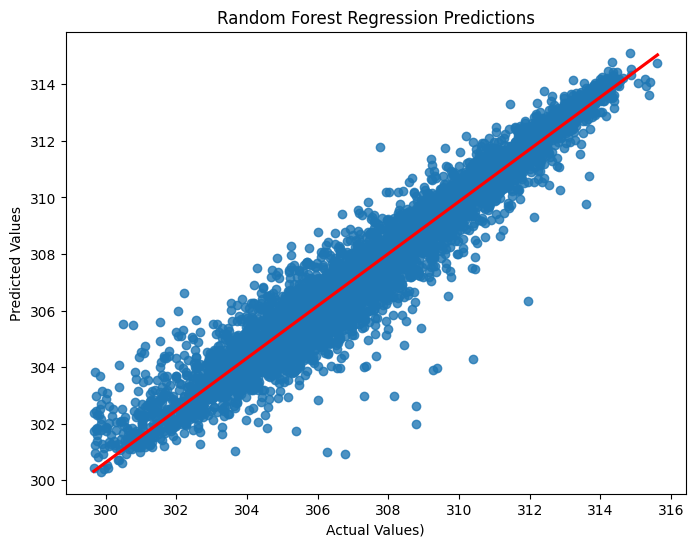

In [49]:
plt.figure(figsize=(8, 6))
sb.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Values)")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression Predictions")
plt.show()

### Gradient Boost

In [50]:
gb_model = GradientBoostingRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)
gb_model.fit(x_train, y_train)
y_hat_gb = gb_model.predict(x_test)
mse = mean_squared_error(y_test, y_hat_gb)
r2 = r2_score(y_test, y_hat_gb)
print(f"Gradient Boosting MSE: {mse:.4f}")
print(f"Gradient Boosting R²: {r2:.4f}")

Gradient Boosting MSE: 0.6039
Gradient Boosting R²: 0.9421


In [51]:
param_dist_gb = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(4, 12),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', 10, 16]
}

gb = GradientBoostingRegressor(random_state=42)

gb_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist_gb,
    n_iter=40,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

gb_search.fit(x_train, y_train)

print("Best Parametres:", gb_search.best_params_)
print("CV R²:", gb_search.best_score_)

# Test performance
y_pred_gb = gb_search.best_estimator_.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_gb))
print("Test MSE:", mean_squared_error(y_test, y_pred_gb))

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parametres: {'learning_rate': 0.07530815376116708, 'max_depth': 9, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 289}
CV R²: 0.9470045924808413
Test R²: 0.9512076730785308
Test MSE: 0.5087865158211139


Decision Tree MSE: 0.5088
Decision Tree R²: 0.9512


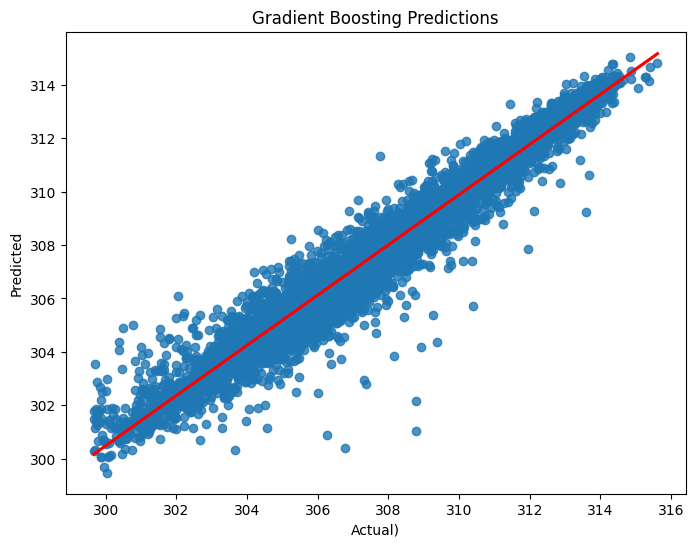

In [52]:
best_model = gb_search
y_hat = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print(f"Decision Tree MSE: {mse:.4f}")
print(f"Decision Tree R²: {r2:.4f}")
plt.figure(figsize=(8, 6))
sb.regplot(x=y_test, y=y_hat, line_kws={"color": "red"})
plt.xlabel("Actual)")
plt.ylabel("Predicted")
plt.title("Gradient Boosting Predictions")
plt.show()

### XGBoost

In [53]:
# Best Model
xgb_best = XGBRegressor(
    n_estimators=300,           
    learning_rate=0.1,          
    max_depth=9,                
    min_child_weight=5,         
    colsample_bytree=0.8,       
    subsample=0.8,              
    random_state=42,
    verbosity=0
)

# Train the model
xgb_best.fit(x_train, y_train)
 
# Test set predictions
y_pred_xgb = xgb_best.predict(x_test)

# Performance metrics
print(" XGBoost Test R²:", r2_score(y_test, y_pred_xgb))
print(" XGBoost Test MSE:", mean_squared_error(y_test, y_pred_xgb))


xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

 XGBoost Test R²: 0.953797699783453
 XGBoost Test MSE: 0.4817787720584127


XGBoost MSE: 0.4818
XGBoost R²: 0.9538


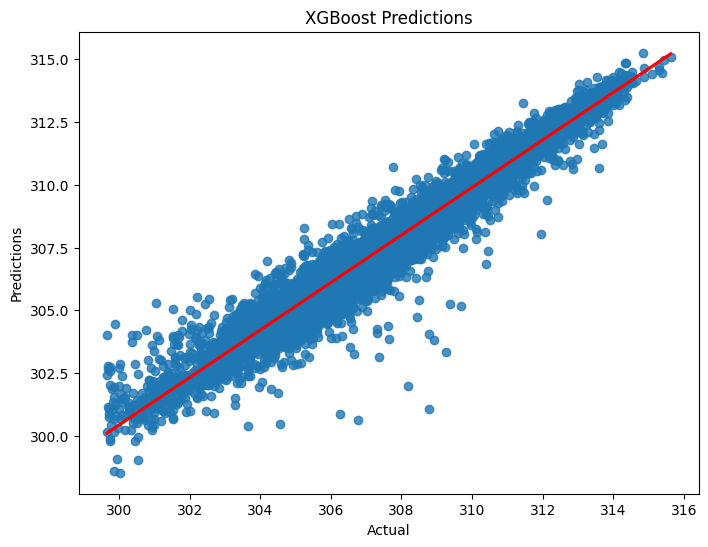

In [54]:
best_model = xgb_best
y_hat = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost R²: {r2:.4f}")
plt.figure(figsize=(8, 6))
sb.regplot(x=y_test, y=y_hat, line_kws={"color": "red"})
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("XGBoost Predictions")
plt.show()

### SVM

In [55]:

param_grid = {
    'kernel': ['rbf'],
    'C': [10],
    'epsilon': [0.01],
    'gamma': ['scale']
}

grid = GridSearchCV(SVR(), param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid.fit(x_train_scaled, y_train)

# Predictions
y_pred_1 = grid.predict(x_test_scaled)
print("---- Only Scale ----")
print("Best Parametres:", grid.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_1))
print("R²:", r2_score(y_test, y_pred_1))

svm_mse = mean_squared_error(y_test, y_pred_1)
svm_r2 = r2_score(y_test, y_pred_1)

---- Only Scale ----
Best Parametres: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
MSE: 0.974566102130383
R²: 0.9065396853432997


In [56]:

# GridSearchCV
param_grid = {
    'kernel': ['rbf'],
    'C': [10],
    'epsilon': [0.1],
    'gamma': ['scale']
}
grid = GridSearchCV(SVR(), param_grid, cv=2, n_jobs=-1)
grid.fit(x_train_pca_var, y_train)

y_pred_2 = grid.predict(x_test_pca_var)
print("---- Scale + PCA ----")
print("Best Parametres:", grid.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_2))
print("R²:", r2_score(y_test, y_pred_2))

---- Scale + PCA ----
Best Parametres: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
MSE: 1.091229449825609
R²: 0.8953517390760682


In [57]:
# GridSearchCV
grid = GridSearchCV(SVR(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_pls, y_train)

y_pred_3 = grid.predict(x_test_pls)
print("---- Scale + PLS ----")
print("Best Parametres:", grid.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_3))
print("R²:", r2_score(y_test, y_pred_3))

---- Scale + PLS ----
Best Parametres: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
MSE: 1.0602225213047476
R²: 0.8983252852416519


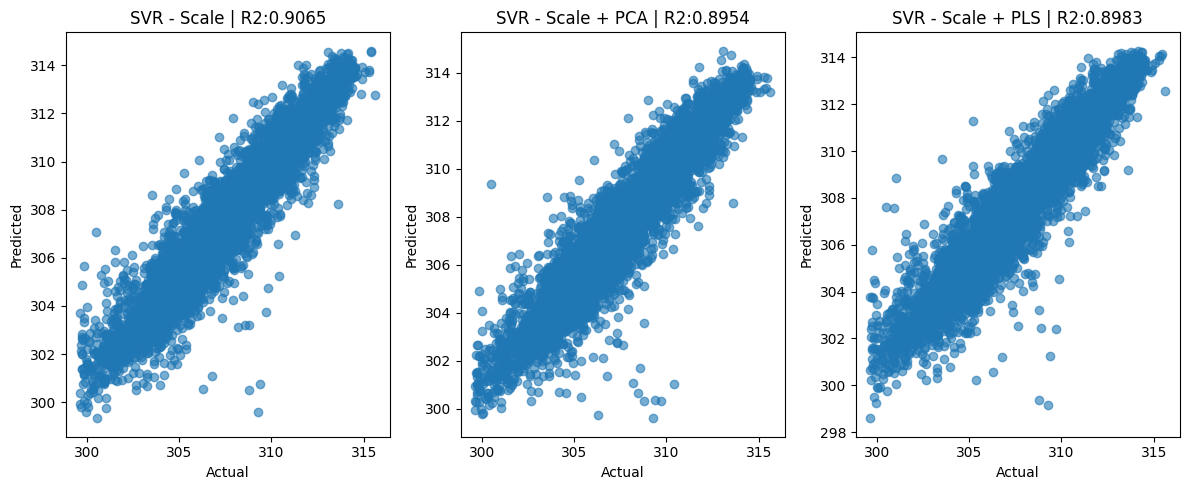

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred_1, alpha=0.6)
plt.title('SVR - Scale | R2:{r2:.4f}'.format(r2=r2_score(y_test, y_pred_1)))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.subplot(132)
plt.scatter(y_test, y_pred_2, alpha=0.6)
plt.title('SVR - Scale + PCA | R2:{r2:.4f}'.format(r2=r2_score(y_test, y_pred_2)))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.subplot(133)
plt.scatter(y_test, y_pred_3, alpha=0.6)
plt.title('SVR - Scale + PLS | R2:{r2:.4f}'.format(r2=r2_score(y_test, y_pred_3)))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

### ANN

In [59]:
# Initial model (baseline)
annmodel = MLPRegressor(random_state=42).fit(x_train_scaled, y_train)

print("Number of layers:", annmodel.n_layers_)
print("Hidden layer structure:", annmodel.hidden_layer_sizes)

annpred = annmodel.predict(x_test_scaled)
print("ANN R²:", r2_score(y_test, annpred))
print("ANN MSE:", mean_squared_error(y_test, annpred))

Number of layers: 3
Hidden layer structure: (100,)
ANN R²: 0.6041727921112394
ANN MSE: 4.127524934259854


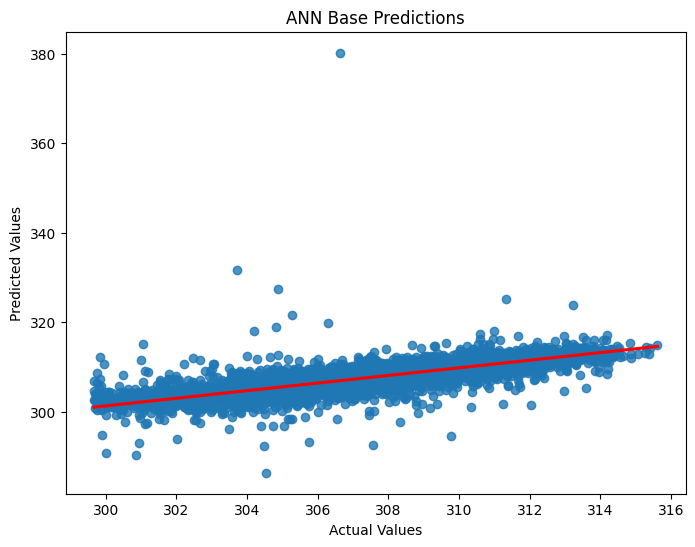

In [60]:
plt.figure(figsize=(8, 6))
sb.regplot(x=y_test, y=annpred, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ANN Base Predictions")
plt.show()

In [61]:
params_ann = {
    "activation": ["tanh", "relu"],  # tanh already tested, now testing relu
    "alpha": [0.01, 0.05, 0.1, 0.2],  # 0.1 performed well, testing nearby values
    "hidden_layer_sizes": [
        (100,),           # Simpler architecture (control group)
        (100, 100),       # Currently best-performing structure
        (128, 64),        # Wide + narrow
        (150, 100, 50),   # Deeper architecture
        (256, 128),       # Wider structures for larger data
    ],
    "solver": ["adam"],
}

gsann = GridSearchCV(
    MLPRegressor(random_state=42, early_stopping=True, max_iter=300),
    params_ann,
    cv=3,  # 3-fold CV instead of 5 for faster performance
    n_jobs=-1,
    scoring='r2',
    verbose=True
)

gsann.fit(x_train_scaled, y_train)

print("Best ANN parameters:", gsann.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best ANN parameters: {'activation': 'tanh', 'alpha': 0.2, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [62]:
best_ann = MLPRegressor(
    activation='tanh',
    alpha=0.2,
    hidden_layer_sizes=(100, 100),
    solver='adam',
    early_stopping=True,
    random_state=42
).fit(x_train_scaled, y_train)

In [63]:
y_pred_best = best_ann.predict(x_test_scaled)

print("Optimize ANN R²:", r2_score(y_test, y_pred_best))
print("Optimize ANN MSE:", mean_squared_error(y_test, y_pred_best))

ann_mse = mean_squared_error(y_test, y_pred_best)
ann_r2 = r2_score(y_test, y_pred_best)

Optimize ANN R²: 0.8921436453885802
Optimize ANN MSE: 1.1246821443919464


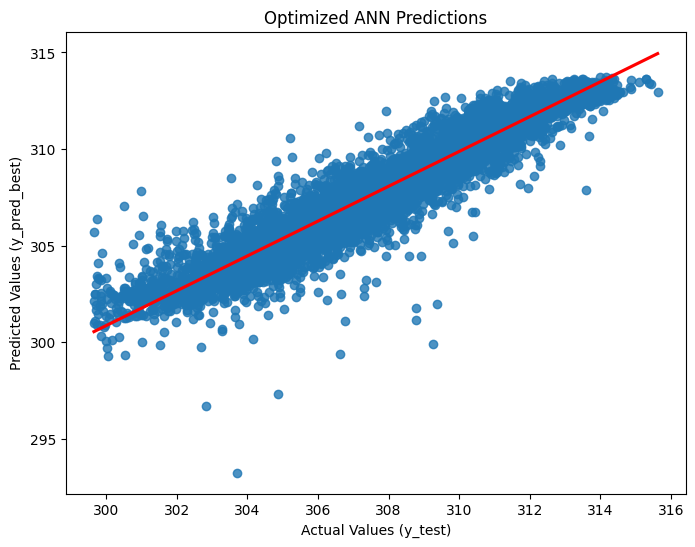

In [64]:
plt.figure(figsize=(8, 6))
sb.regplot(x=y_test, y=y_pred_best, line_kws={"color": "red"})
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_best)")
plt.title("Optimized ANN Predictions")
plt.show()

### Model Choosing

In [65]:
models = ['Linear Regression','Ridge', 'Lasso', 'KNN', 'Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVR', 'ANN']
r2 = [lr_r2, ridge_r2, lasso_r2, knn_r2, dt_r2, bgr_r2, rf_r2, gb_r2, xgb_r2, svm_r2, ann_r2]
mse = [lr_mse, ridge_mse, lasso_mse, knn_mse , dt_mse, bgr_mse, rf_mse, gb_mse, xgb_mse, svm_mse, ann_mse]
list = pd.DataFrame({'Model': models,
                        'MSE': mse,
                        'R2': r2})
print(list[list['R2'] == np.max(list['R2'])],
        "\n------------------------------------------\n",
        list.sort_values('R2', ascending=False))

     Model       MSE        R2
8  XGBoost  0.481779  0.953798 
------------------------------------------
                 Model       MSE        R2
8             XGBoost  0.481779  0.953798
7   Gradient Boosting  0.508787  0.951208
6       Random Forest  0.597719  0.942679
5             Bagging  0.655981  0.937092
9                 SVR  0.974566  0.906540
4       Decision Tree  1.123253  0.892281
10                ANN  1.124682  0.892144
3                 KNN  1.171281  0.887675
1               Ridge  2.098551  0.798750
0   Linear Regression  2.098786  0.798728
2               Lasso  2.107656  0.797877


## 4. Results

### Model Comparison and Evaluation of Results

This section presents a comparative analysis of the developed models and interpretation of the variables influencing model performance. The model selection process was evaluated not only based on performance metrics but also on statistical significance and variable contribution.

#### 4.1 Model Comparison and Evaluation of Results

When comparing the models based on Mean Squared Error (MSE) and R² scores, it is clear that the best-performing model is **XGBoost**. The XGBoost model achieved:

- The lowest error rate (MSE = 0.4818),
- The highest coefficient of determination (R² = 0.9538),

explaining 95.38% of the variance in the dataset. This indicates a highly accurate and generalizable model performance.

##### Comparison with Other Models

- Other ensemble methods such as **Gradient Boosting** and **Random Forest** also performed well, with R² scores of 0.9512 and 0.9427, respectively. These models ranked just below XGBoost in performance.
- Despite being an ensemble method, the **Bagging Regressor** showed slightly lower performance with an R² score of 0.9371.
- More complex models such as **Support Vector Regression (SVR)** and **Artificial Neural Networks (ANN)** outperformed linear models but fell short of the ensemble methods.
- The **KNN Regressor** delivered moderate performance with a relatively lower R² score of 0.8877 compared to other models.
- Classical linear models such as **Ridge**, **Linear Regression**, and **Lasso** remained around R² ≈ 0.7987 and produced higher MSE values. This indicates that nonlinear relationships dominate the dataset and linear models have limited explanatory power.

##### Overall Evaluation

According to these results, the **XGBoost** model stands out as the most suitable regression model due to its low error rate and high explanatory power. In datasets with complex, high-dimensional, and nonlinear structures, **boosting-based methods** have shown clear superiority over classical models.

While selecting a model, not only scores but also factors such as **interpretability, computational cost, and overfitting risk** should be considered. However, in this specific analysis, XGBoost can be regarded as the strongest candidate both technically and statistically.

#### 4.2 Impact of Scaling and Dimensionality Reduction Methods

- For models such as `Linear Regression`, `KNN`, and `SVR`, **scaling (standardization)** had a positive impact on performance.
- **PCA and PLS** transformations were tested with these models to analyze how learning performance changes with high-dimensional inputs. While PCA reduced noise in some models, it caused information loss in others.

#### 4.3 Statistical Significance Tests

Paired comparison tests were applied to determine whether the model differences were statistically significant or occurred by chance:

- **Paired t-test**: showed that there were significant differences between models (p < 0.05).
- **Wilcoxon Signed-Rank Test**: provided similar results as a non-parametric alternative.

These tests ensured that model selection was supported not only by measured scores but also by statistical reliability.

### Feature Importance

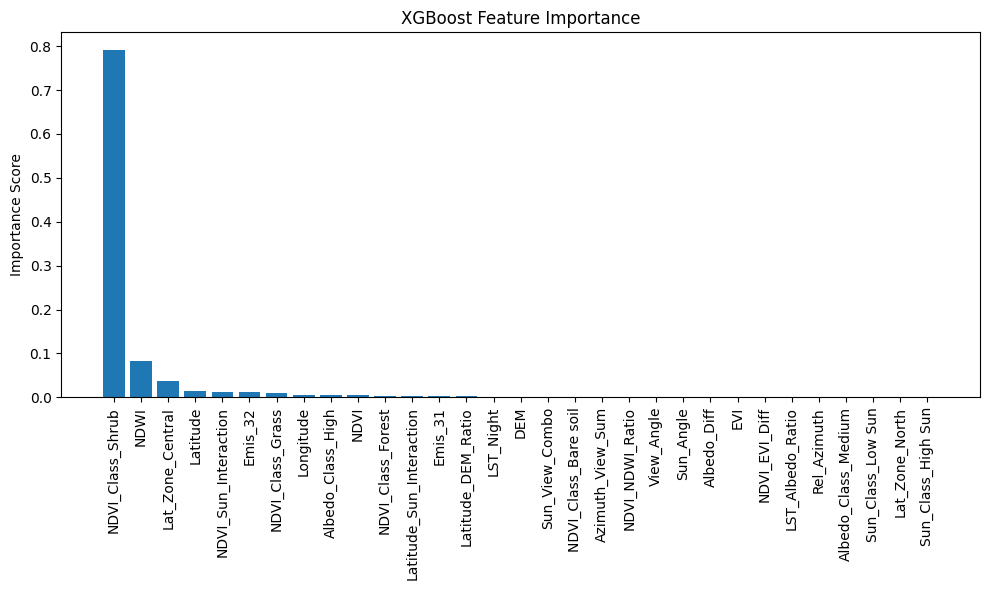

In [66]:
# Get feature names (if X is a DataFrame, it already has X.columns)
feature_names = X.columns

# Retrieve feature importance scores
importances = xgb_best.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Visualization
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

#### 4.4 Interpretation of Feature Importance

According to the feature importance analysis obtained from the XGBoost algorithm, the variable that contributed the most to the model was **`NDVI_Class_Shrub`**. This variable played a clearly dominant role in the learning process and ranked first among all features with an **importance score of 79%**.

##### Top Contributing Variables

- **`NDVI_Class_Shrub`**: Pixels classified as "shrub" in vegetation classification were observed to have a dominant influence on land surface temperature estimation. This can be attributed to the unique microclimatic conditions and reflectance-absorption characteristics of shrub-covered areas.
- **`NDWI`**: This index, representing surface moisture, had a significant impact on temperature.
- **`Lat_Zone_Central`** and **`Latitude`**: The contribution of geographic location variables reflects the strong correlation between surface temperature and latitude.

##### Medium and Low-Contributing Variables

- Variables such as `NDVI_Sun_Interaction`, `Emis_32`, `Longitude`, and `Albedo_Class_High` provided moderate contributions.
- Physical components such as `Sun_Angle`, `DEM`, `LST_Night`, `NDVI_EVI_Diff`, `Rel_Azimuth`, and `Albedo_Diff` had limited impact on the model.

This distribution indicates that the model learned primarily from **vegetation types and surface moisture**, and relied less on geometric or radiative parameters.

#### Interpretation and Recommendation

- The remarkably high influence of NDVI-based classifications suggests that the model's LST predictions are shaped significantly by land cover types.
- The lower weights of physical and geographic variables such as `NDWI`, `Latitude`, `Sun_Angle`, and `DEM` may be due to limited variance or information redundancy (collinearity).
- To improve the model’s balance, it is recommended to introduce **more diverse sampling** or **new physically-derived variables** (e.g., Soil Type, Surface Class, LAI).

### Shap Analysis

#### What is Shap ? 

SHAP is a powerful and mathematically grounded explainability method developed to interpret the decisions of machine learning models. SHAP aims to explain **why and to what extent** a model made a particular prediction at the feature level.

##### Theoretical Foundation: Game Theory and Shapley Value

The SHAP algorithm is based on the concept of the **Shapley value** from cooperative game theory. According to this concept, each player's (here, each variable's) contribution to the outcome is calculated fairly by considering all possible combinations of players.

- Using this approach, SHAP quantifies the contribution of each variable to the model's output in a **positive or negative direction** and in **numerical terms**.

##### Contributions Provided by SHAP

- **Global Explanation**: Shows which variables are generally more influential across the entire dataset.
- **Local Explanation**: Explains why the model made a specific prediction for each individual observation (row).
- **Interpretability**: Makes the internal decision structure of black-box models visible.
- **Fairness and Transparency**: Establishes a scientific, transparent, and auditable foundation for model predictions.

##### Visualization Methods

- **Summary Plot**: Displays the importance, direction, and value distribution of features simultaneously.
- **Force Plot**: Visually explains the reasons behind individual predictions.
- **Dependence Plot**: Shows how changes in a single variable affect the model output.

##### Why Use SHAP?

SHAP is particularly useful for understanding the inner workings of **tree-based models (Random Forest, XGBoost)** and **artificial neural networks**, which are often difficult to interpret. This enables data scientists to assess the reliability of model predictions and identify faulty or biased decisions at an early stage.

##### Conclusion

By bringing interpretability to machine learning models, SHAP ensures scientific clarity and increases model trustworthiness. For this reason, SHAP analysis has become as important as performance evaluation in modern data science projects.

#### Shap

In [67]:
x_train.dtypes.value_counts()

float64    21
bool       10
Name: count, dtype: int64

In [68]:
x_train = x_train.astype(float)

In [69]:
# 1. Create the SHAP explainer
explainer = shap.Explainer(xgb_best, x_train)

# 2. Compute SHAP values
shap_values = explainer(x_train)

100%|===================| 16636/16670 [06:18<00:00]        

##### 1. SHAP Summary Plot – Feature Impact Ranking

This plot shows which features the model relies on the most across the entire dataset.

- **NDWI** is the most influential feature in the model.
- **Latitude** and **Longitude** reflect the effect of geographic location on temperature.
- Interaction features such as **NDVI_Sun_Interaction** and **Albedo_Diff** also made significant contributions.
- The color scale indicates whether the feature value is low (blue) or high (red).
- A positive SHAP value indicates an increasing effect on the model's prediction, while a negative value indicates a decreasing effect.

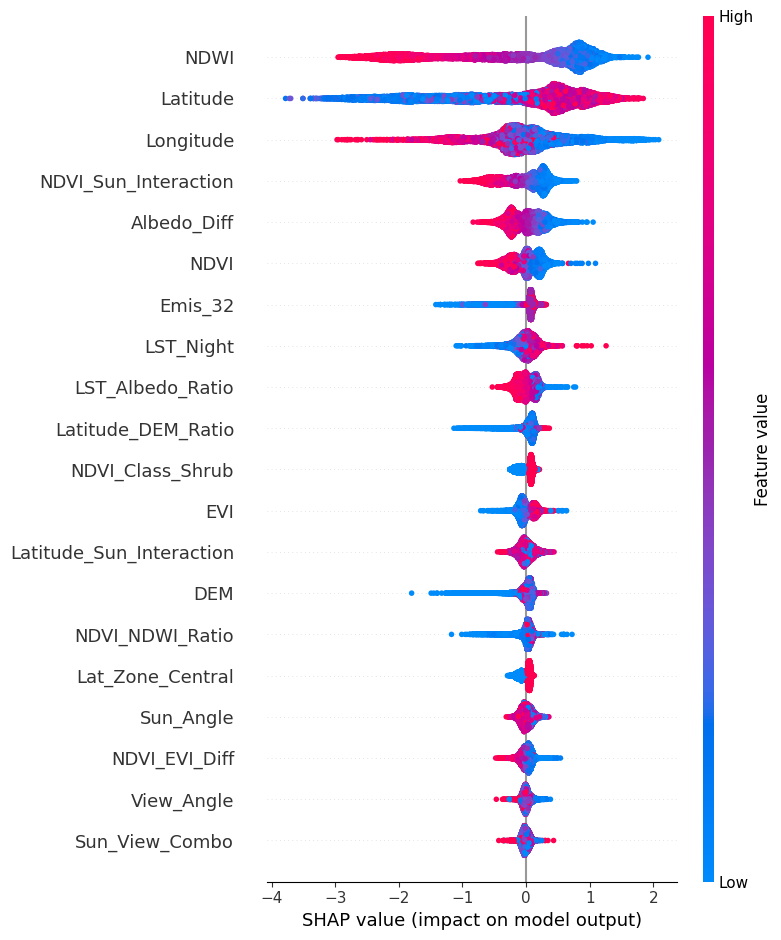

In [70]:
shap.summary_plot(shap_values, x_train)

##### 2. SHAP Force Plot – Individual Observation Explanation

This visual provides an explanation of how the model made a prediction for a randomly selected observation.

- Mean prediction value: ~308  
- Final model prediction: **311.11**  
- Variables such as `Latitude_DEM_Ratio`, `NDVI`, `NDVI_Sun_Interaction`, and `NDWI` contributed positively to the prediction.  
- The `Latitude` variable had a slightly decreasing effect on the temperature prediction.  

This analysis reveals the key factors influencing the temperature value of a specific pixel.

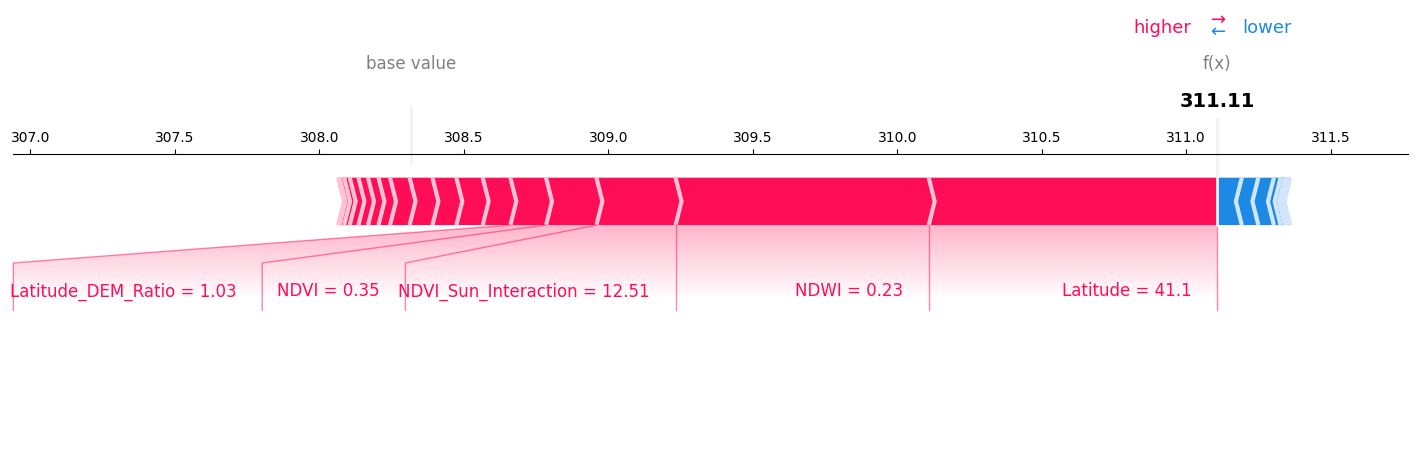

In [71]:
rounded = x_train.iloc[0].round(2)

shap.force_plot(
    explainer.expected_value,
    shap_values[0].values,
    rounded,
    feature_names=x_train.columns,
    matplotlib=True,
    figsize=(18, 4)
)

##### 3. SHAP Dependence Plot – Effect of NDVI

This plot examines the effect of the NDVI variable on the prediction and its interaction with the Latitude variable.

- **As NDVI increases, the SHAP effect decreases**, indicating that dense vegetation is generally associated with lower surface temperatures.
- The color gradient representing Latitude reveals that the impact of NDVI varies by geographic location.
- Especially at NDVI levels greater than 0.4, SHAP values tend to become negative.

This indicates that **as vegetation density increases, surface temperature decreases**, and this relationship is **interactive with latitude**.

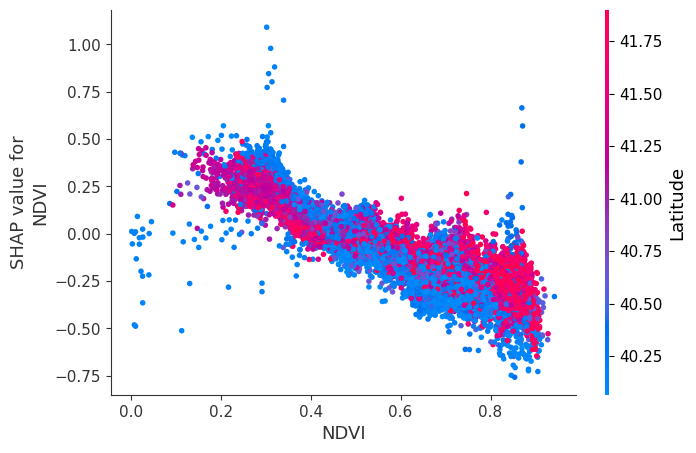

In [72]:
shap.dependence_plot("NDVI", shap_values.values, x_train)

##### Overall Evaluation

SHAP analyses reveal that:

- The model effectively utilized **vegetation indicators (NDVI, NDWI)**, **location information (Latitude, Longitude)**, and **radiation-interaction factors**.
- Derived variables such as `NDVI_Sun_Interaction` and `Latitude_DEM_Ratio` made meaningful contributions to the model’s decisions.
- These explanations show that the model is not only powerful but also **interpretable**.

SHAP goes beyond classical feature importance analysis by providing a more transparent and detailed view of variable effects.

### Shap vs Feature Importance

Within the scope of model explainability, it has been observed that the classical “Feature Importance” approach and the SHAP (SHapley Additive exPlanations) method offer complementary yet conceptually different perspectives. Although both methods aim to show which features the model prioritizes, they differ in their underlying assumptions, scales of analysis, and interpretability.

---

#### Interpretive Differences

**Feature Importance** measures which features the model relied on most during training. This measurement is typically based on structural metrics such as “information gain” or “split frequency” used in decision-making processes of tree-based models. However, this approach does not indicate how or in what direction a feature contributes to the model output.

In contrast, the **SHAP value** calculates the contribution of each feature to each individual prediction. This contribution can be either positive or negative, and SHAP reveals both the direction and magnitude of each feature's influence at the prediction level. Therefore, SHAP explains not only **how much** a feature is used by the model, but also **why and how** it is used.

---

#### Commentary

- Feature importance offers a structural insight, summarizing the model's **static learning patterns**.  
- SHAP, on the other hand, deciphers the prediction-based decision process, making the model’s **dynamic reasoning mechanism** transparent.  
- Especially in datasets where nonlinear relationships, feature interactions, and instance-level interpretations are important, SHAP provides a significantly higher level of explainability.

In this context, Feature Importance focuses on generalization, while SHAP emphasizes justification.

---

#### Conclusion

Interpretations based solely on feature importance may fall short in understanding the logic behind model predictions. This study has shown that:

- SHAP allows for evaluating feature effects not only in magnitude but also in direction.  
- Some features, although rarely used by the model overall, can have a meaningful impact on specific observations as revealed by SHAP analysis.

In conclusion, SHAP values go beyond traditional importance rankings, enabling a more detailed and justified understanding of model behavior.